## Objectif d'Analyse

-Academy: Startup de EdTech <br>
-Formations en ligne pour un public de niveau lycée et universitaire <br>
-L’entreprise veut développer son offre internationale <br>
-Objectif: Informer le projet d’expansion grâce à une analyse pré-exploratoire d’un jeu de données de la World Bank

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Setting up the data model

In [3]:
#Open relevant files
data = pd.read_csv('EdStatsData.csv')
country_data = pd.read_csv('EdStatsCountry.csv')
series_data = pd.read_csv('EdStatsSeries.csv')

In [4]:
#Merge data with country_data based on Country Code
data_merge1 = pd.merge(data, country_data[['Country Code','Region', 'Income Group']], left_on = 'Country Code', right_on = 'Country Code', how = 'left')

In [5]:
#Merge the merged dataset with series data based on Indicator Code
data_comp = pd.merge(data_merge1, series_data[['Series Code', 'Topic', 'Short definition']], left_on = 'Indicator Code', right_on = 'Series Code', how = 'left')

In [6]:
#Checking resulting dataset still has same number of lines as EdStatsData to ensure no duplication occurred during merge
data_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886930 entries, 0 to 886929
Data columns (total 75 columns):
Country Name        886930 non-null object
Country Code        886930 non-null object
Indicator Name      886930 non-null object
Indicator Code      886930 non-null object
1970                72288 non-null float64
1971                35537 non-null float64
1972                35619 non-null float64
1973                35545 non-null float64
1974                35730 non-null float64
1975                87306 non-null float64
1976                37483 non-null float64
1977                37574 non-null float64
1978                37576 non-null float64
1979                36809 non-null float64
1980                89122 non-null float64
1981                38777 non-null float64
1982                37511 non-null float64
1983                38460 non-null float64
1984                38606 non-null float64
1985                90296 non-null float64
1986                39372 non

## Describing the data

In [7]:
#Get the number of non-null rows per year to see whether stats become more complete in later years
test = data_comp.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Series Code', 'Region', 'Short definition', 'Income Group', 'Topic'], var_name = 'Year', value_name = 'Value')

Text(0.5, 1.0, 'Number of Non-Null Values per Year')

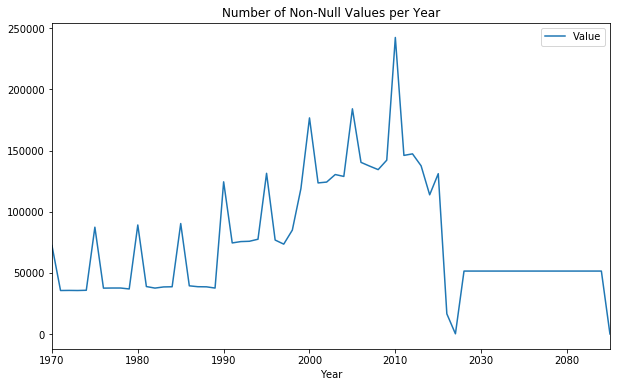

In [8]:
test.pivot_table('Value', 'Year', aggfunc = 'count').plot();
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Number of Non-Null Values per Year')

In [9]:
#Figuring out the total amount of null values per column
null_data = data_comp.isnull().sum()

In [10]:
#Making a data frame out of the null data columns
null_data_df = pd.DataFrame(null_data)
null_data_df.columns = ['Missing Data']

In [11]:
#Calculating overall % null values
total_null = round((null_data_df['Missing Data'].sum() / (len(data_comp.columns)*len(data_comp)))*100,2)

In [12]:
print(f'This dataset contains {total_null}% null values')

This dataset contains 81.26% null values


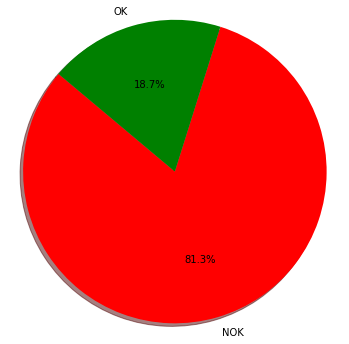

In [13]:
#Pie Chart to represent missing data
labels = 'NOK', 'OK'
sizes = [total_null, 100-total_null]
colors = ['red', 'green']

# Plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.rc('font', size = 15)
plt.show();

In [14]:
#Make a data frame to show missing data per column
null_columns = pd.DataFrame(100-((data_comp.isnull().sum()/len(data))*100))
null_columns.columns = ['Completeness']

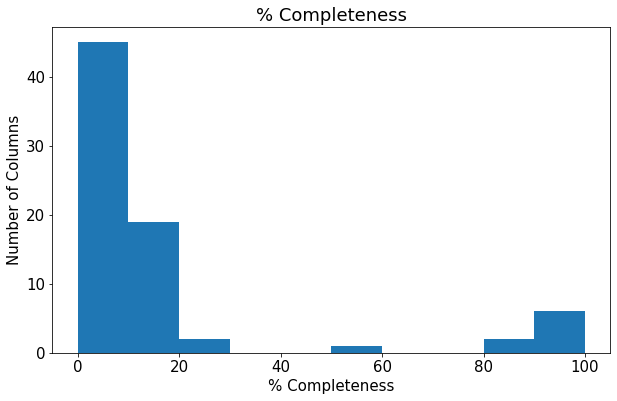

In [15]:
#Histogram to show spread of completeness of data
null_columns.hist(bins = 10)
plt.grid(b = None)
plt.ylabel('Number of Columns')
plt.xlabel('% Completeness')
plt.title('% Completeness')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.rc('font', size = 12)
plt.show()

In [16]:
#Making a list of duplicate rows
data_comp[data_comp.duplicated()]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2085,2090,2095,2100,Unnamed: 69,Region,Income Group,Series Code,Topic,Short definition


## Cleaning the data

In [17]:
#Checking what is inside the Region 'null' values
data_comp[data_comp['Region'].isnull()]['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'British Virgin Islands',
       'Gibraltar', 'Nauru'], dtype=object)

In [18]:
#Filtering out Region null as these are aggregated country groups instead of actual countries. This will avoid data duplication.
data_comp.dropna(subset = ['Region'], inplace = True)

In [19]:
#Removing automatically created unnamed column that has no values
data_comp.drop(columns = ['Unnamed: 69'], inplace = True)

In [20]:
#Checking which years seem to have the most data.
data_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784310 entries, 91625 to 886929
Data columns (total 74 columns):
Country Name        784310 non-null object
Country Code        784310 non-null object
Indicator Name      784310 non-null object
Indicator Code      784310 non-null object
1970                68553 non-null float64
1971                31639 non-null float64
1972                31506 non-null float64
1973                31304 non-null float64
1974                31468 non-null float64
1975                82961 non-null float64
1976                33094 non-null float64
1977                33190 non-null float64
1978                33190 non-null float64
1979                32353 non-null float64
1980                84602 non-null float64
1981                34201 non-null float64
1982                32959 non-null float64
1983                33809 non-null float64
1984                33899 non-null float64
1985                85243 non-null float64
1986                34328

Concluding that keeping data from 2010 to 2017 seems relevant for past data. Anything before that is not of use to us.

In [21]:
#Dropping all columns before 2010
data_comp.drop(data.iloc[:, 4:44], inplace = True, axis = 1)

## Selecting relevant data

### Look at population distribution to determine a cut-off point

In [22]:
#Check what year has the last reliable data for population
data_pop = data_comp[data_comp['Indicator Code'] == 'SP.POP.TOTL']

In [23]:
data_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 94158 to 885798
Data columns (total 34 columns):
Country Name        214 non-null object
Country Code        214 non-null object
Indicator Name      214 non-null object
Indicator Code      214 non-null object
2010                214 non-null float64
2011                214 non-null float64
2012                213 non-null float64
2013                213 non-null float64
2014                209 non-null float64
2015                209 non-null float64
2016                209 non-null float64
2017                0 non-null float64
2020                0 non-null float64
2025                0 non-null float64
2030                0 non-null float64
2035                0 non-null float64
2040                0 non-null float64
2045                0 non-null float64
2050                0 non-null float64
2055                0 non-null float64
2060                0 non-null float64
2065                0 non-null float64
2070        

Concluding that 2016 is the last reliable year of data for this indicator.

In [25]:
#Unpivoting to be able to convert to pivot and visualize
data_pop = data_pop.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Series Code', 'Region', 'Short definition', 'Income Group', 'Topic'], var_name = 'year', value_name = 'value')

In [26]:
#Checking 25th percentile
data_pop[data_pop['year'] == '2016'].describe().apply(lambda x: '%.0f' % x, axis=1)

count           209
mean       35412115
std       136872209
min           11097
25%         1170125
50%         6725308
75%        24127159
max      1378665000
dtype: object

In [27]:
#Make a list of statistic measures
stat_pop = data_pop[data_pop['year'] == '2016'].describe().apply(lambda x: '%.0f' % x, axis=1).tolist()

In [28]:
#Keep Mean, 25th, 50th and 75th percentile
stat_pop = [stat_pop[i] for i in (1,4,5,6)]
stat_pop = [float(i) for i in stat_pop]

In [29]:
#Check which percentage of the countries would be dropped using any of these statistical measures
for i in stat_pop:
    countries_to_drop = data_pop[(data_pop['value'] <= i) & (data_pop['year'] == '2016')]['Country Name'].unique().tolist()
    print(str(round(len(countries_to_drop)/len(data_pop['Country Name'].unique().tolist()),2)*100) + '%')

80.0%
25.0%
49.0%
73.0%


Choosing to use 25th percentile as cutoff point as any other measure would result in half the dataset getting cut out, which is too much

In [30]:
#Making list of all countries below 25th percentile
countries_to_drop = data_pop[(data_pop['value'] <= stat_pop[1]) & (data_pop['year'] == '2016')]['Country Name'].unique().tolist()

In [31]:
#Dropping countries
data_comp = data_comp[~data_comp['Country Name'].isin(countries_to_drop)]

### Looking at Internet Usage to determine a cut-off point

In [32]:
#Select Internet Users indicator
data_int = data_comp[data_comp['Indicator Code'] == 'IT.NET.USER.P2']

In [33]:
#Unpivoting to be able to convert to pivot and visualize
data_int = data_int.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Series Code', 'Region', 'Short definition', 'Income Group', 'Topic'], var_name = 'year', value_name = 'value')

In [34]:
#Make a list of statistic measures
stat_int = data_int[data_int['year'] == '2016'].describe().apply(lambda x: '%.0f' % x, axis=1).tolist()

In [35]:
#Keep Mean, 25th, 50th and 75th percentile
stat_int = [stat_int[i] for i in (1,4,5,6)]
stat_int = [float(i) for i in stat_int]

In [36]:
#Check which percentage of the countries would be dropped using any of these statistical measures
for i in stat_int:
    countries_to_drop2 = data_int[(data_int['value'] <= i) & (data_int['year'] == '2016')]['Country Name'].unique().tolist()
    print(str(round(len(countries_to_drop2)/len(data_int['Country Name'].unique().tolist()),2)*100) + '%')

47.0%
24.0%
48.0%
72.0%


Choosing to use 25th percentile as cutoff point as any other measure would result in half the dataset getting cut out, which is too much

In [37]:
#Making list of all countries below 25th percentile
countries_to_drop2 = data_int[(data_int['value'] <= stat_int[1]) & (data_int['year'] == '2016')]['Country Name'].unique().tolist()

In [38]:
#Dropping countries from dataset
data_comp = data_comp[~data_comp['Country Name'].isin(countries_to_drop2)]

### Looking at Literacy Rate to determine a cut-off point

In [39]:
#Select Internet Users indicator
data_lit = data_comp[data_comp['Indicator Code'] == 'SE.ADT.LITR.ZS']

In [40]:
#Unpivoting to be able to convert to pivot and visualize
data_lit = data_lit.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Series Code', 'Region', 'Short definition', 'Income Group', 'Topic'], var_name = 'year', value_name = 'value')

In [41]:
#Checking 25th percentile
data_lit[data_lit['year'] == '2016'].describe()

,value
count,11.000000
mean,94.220776
std,6.853416
min,75.551200
25%,94.261950
50%,96.930230
75%,97.688800
max,99.790060


Judging that Literacy rate of 75% is sufficient to be considered a candidate country.

## Finalizing two clean Datasets

Making one past and one future dataset consisting only of indicators deemed useful to the analysis.

### Past Data

In [42]:
#Dropping all future year columns
past_data = data_comp.drop(data_comp.iloc[:, 12:-5], axis = 1)

In [43]:
#A lot of indicators are missing information for several countries. We want to find which indicators have sufficient coverage to be useful
past_ind_table = past_data.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Region', 'Income Group', 'Series Code', 'Topic', 'Short definition'], var_name = 'Year', value_name = 'Value')

In [44]:
#Pivot table
table = past_ind_table.pivot_table('Value', 'Indicator Name', 'Year', aggfunc = 'count')

In [45]:
#Convert the values in the pivot table to percentages
table = round(table / len(past_ind_table['Country Name'].unique().tolist()),3)

In [46]:
#Make a list of different percentage completion to try out
pct_list = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

In [47]:
#Check what % of indicators you would retain with each percentage in the above list
for i in pct_list:
    print(round(len(table[table['2016'] >= i])/len(table),4)*100)

1.7500000000000002
1.34
1.15
1.15
0.95
0.63


In [48]:
#Keep only indicators that have a fill rate of 85% and above as we want to keep at least 1% of indicators (37 indicators)
table = table[table['2016'] >= 0.85]

In [49]:
#Generate list of relevant indicators to keep in dataset
past_indicators = table.index.tolist()

In [50]:
#List of candidate indicators
past_indicators

['Duration of compulsory education (years)',
 'GDP at market prices (constant 2005 US$)',
 'GDP at market prices (current US$)',
 'GDP per capita (constant 2005 US$)',
 'GDP per capita (current US$)',
 'GDP per capita, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP, PPP (current international $)',
 'GNI (current US$)',
 'GNI per capita, Atlas method (current US$)',
 'GNI per capita, PPP (current international $)',
 'GNI, PPP (current international $)',
 'Internet users (per 100 people)',
 'Labor force, female (% of total labor force)',
 'Labor force, total',
 'Mortality rate, under-5 (per 1,000)',
 'Official entrance age to pre-primary education (years)',
 'Official entrance age to upper secondary education (years)',
 'Population growth (annual %)',
 'Population of the official entrance age to primary education, both sexes (number)',
 'Population of the official entrance age to primary education

In [51]:
#Drop all irrelevant indicators
past_data = past_data.loc[past_data['Indicator Name'].isin(past_indicators)]

In [52]:
#Unpivot data to get in right format
past_data = past_data.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Region', 'Income Group', 'Series Code', 'Topic', 'Short definition'], var_name = 'Year', value_name = 'Value')

### Future Data

In [53]:
#Dropping all past year columns
future_data = data_comp.drop(data_comp.iloc[:, 4:12], axis = 1)

In [54]:
#Keeping indicators Total Population in thousands by highest level of educational attainment: Lower Secondary, Upper Secondary and Post Secondary
future_indicators = [
    'PRJ.POP.ALL.2.MF',
    'PRJ.POP.ALL.3.MF',
    'PRJ.POP.ALL.4.MF',  
]

In [55]:
#Drop all irrelevant indicators
future_data = future_data.loc[future_data['Indicator Code'].isin(future_indicators)]

In [56]:
#Unpivot data to get into right format
future_data = future_data.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Series Code', 'Region', 'Short definition', 'Income Group', 'Topic'], var_name = 'Year', value_name = 'Value')

# Analyzing Data

## Past Data

### Internet Use

In [57]:
#Selecting Internet Users indicator for the year 2016
ind_internet = past_data[(past_data['Indicator Name'] == 'Internet users (per 100 people)') & (past_data['Year'] == '2016')]

In [58]:
#Pivoting dataset
ind_internet_table = ind_internet.pivot_table('Value', 'Region')

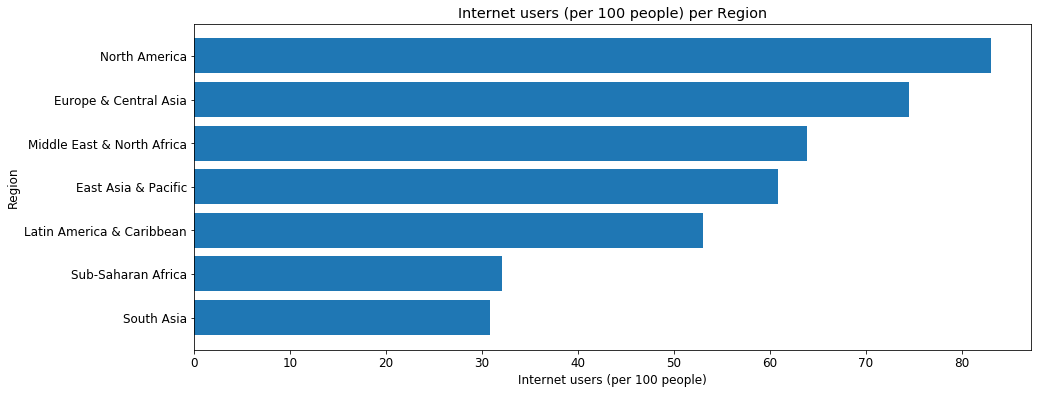

In [59]:
#Generating horizontal bar chart and sorting by the value of the 'Value' column
y_pos = ind_internet_table.sort_values(by = ['Value']).index
internet_use = ind_internet_table.sort_values(by = ['Value'])['Value']

plt.barh(y_pos, internet_use, align='center')
plt.xticks()
plt.ylabel('Region')
plt.xlabel('Internet users (per 100 people)')
plt.title('Internet users (per 100 people) per Region')
fig = plt.gcf()
fig.set_size_inches(15, 6)

plt.show()

In [60]:
#General statistics for this indicator
ind_internet_table.describe().round()

,Value
count,7.0
mean,57.0
std,20.0
min,31.0
25%,43.0
50%,61.0
75%,69.0
max,83.0


In [61]:
#Creating pivot table to drill down on country level
ind_internet_table2 = ind_internet.pivot_table('Value',['Region', 'Country Name'])

In [62]:
#Making a list of regions to iterate through
region_list = ind_internet_table2.reset_index()

In [63]:
region_list = region_list['Region'].unique().tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


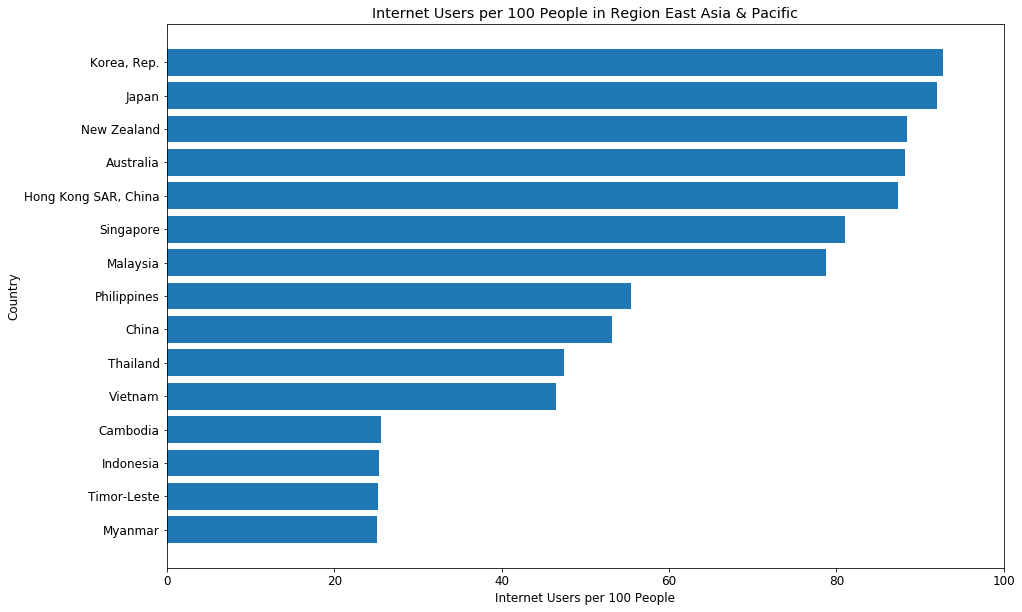

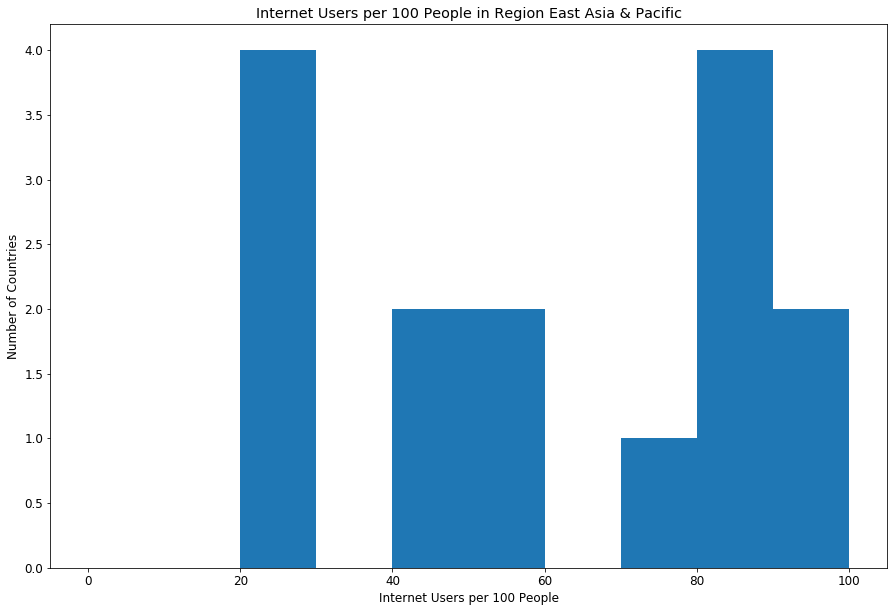

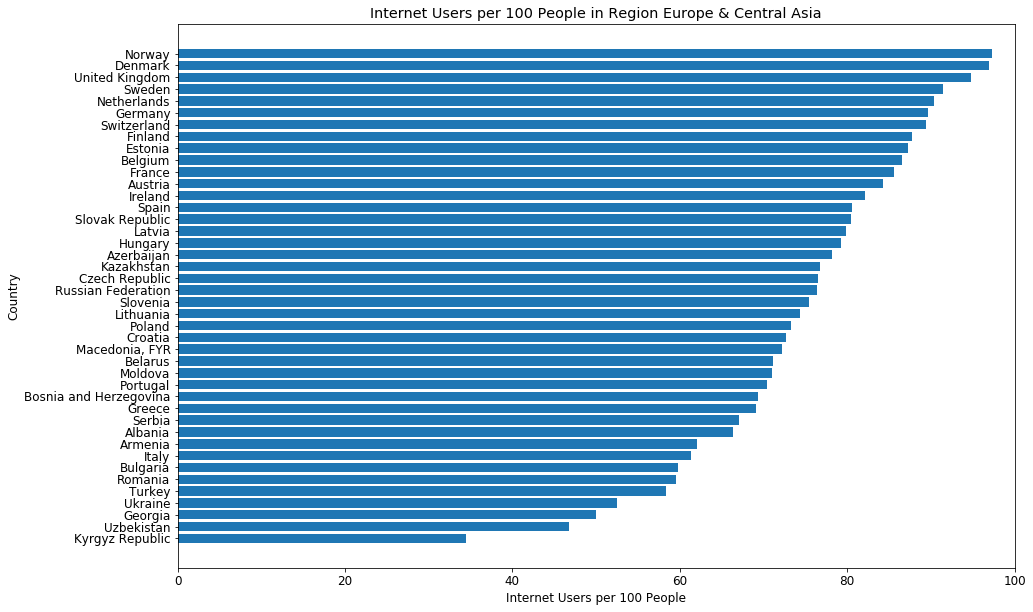

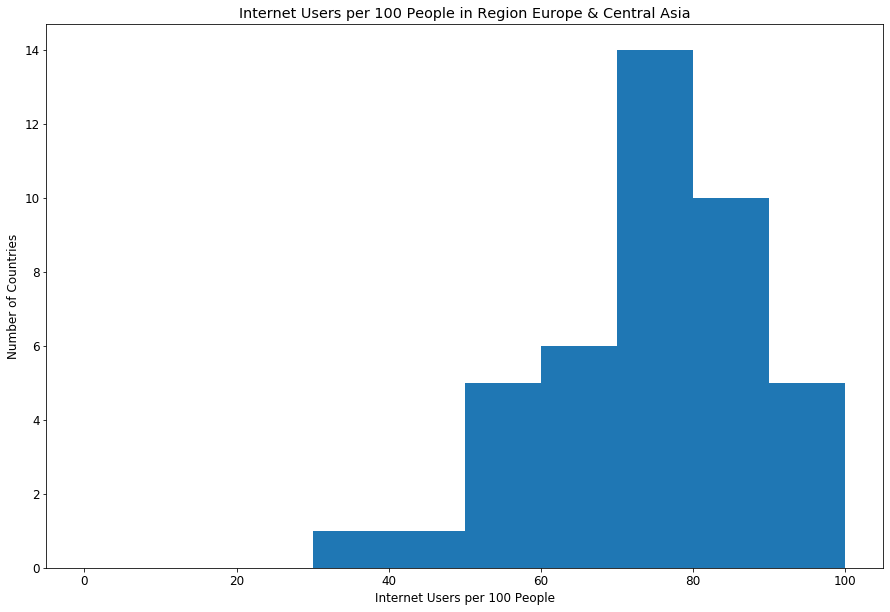

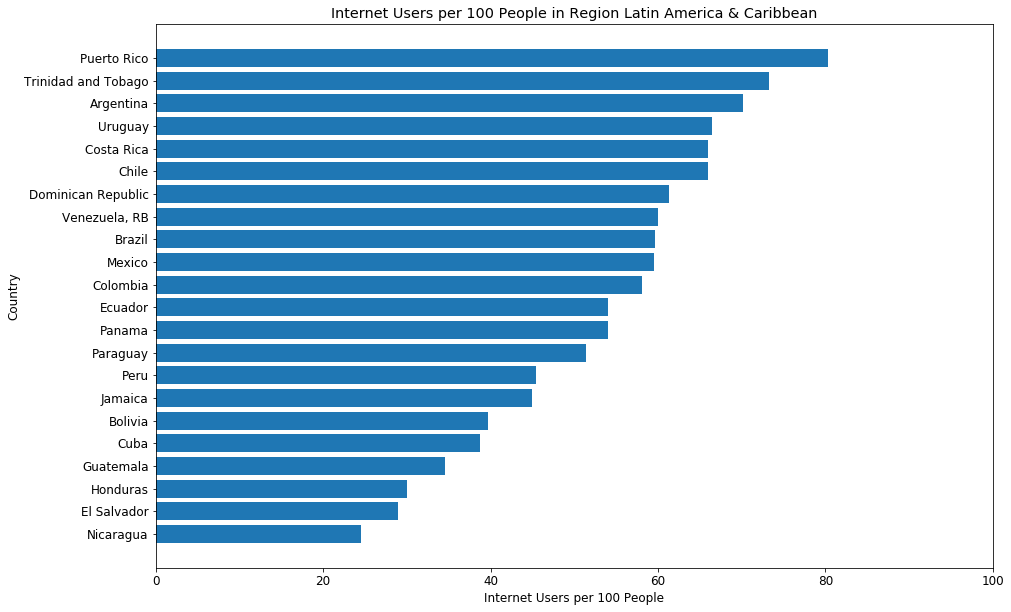

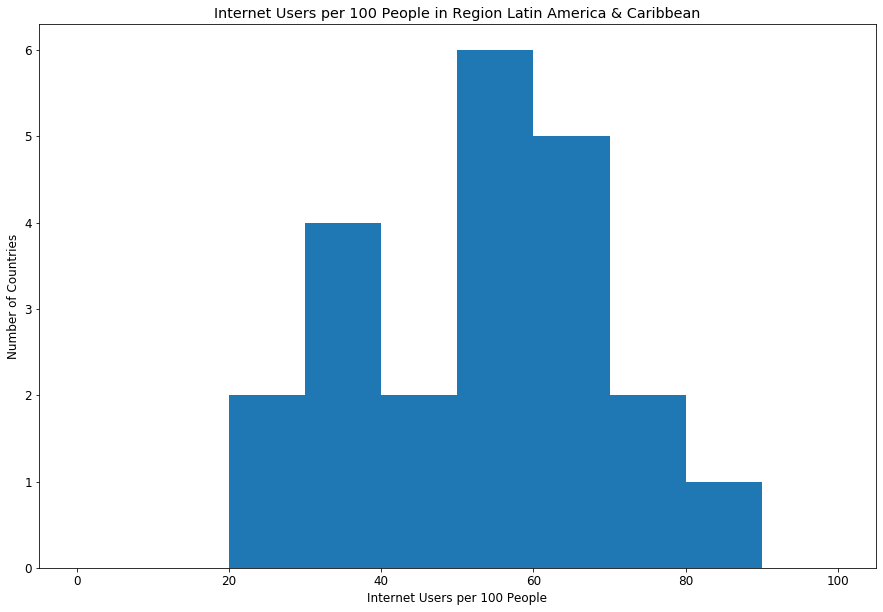

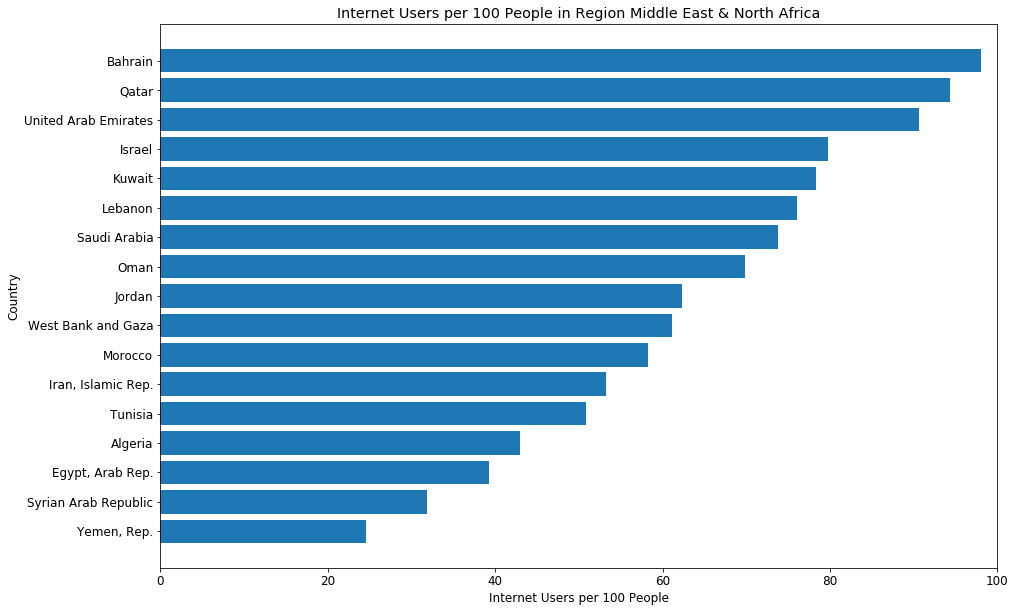

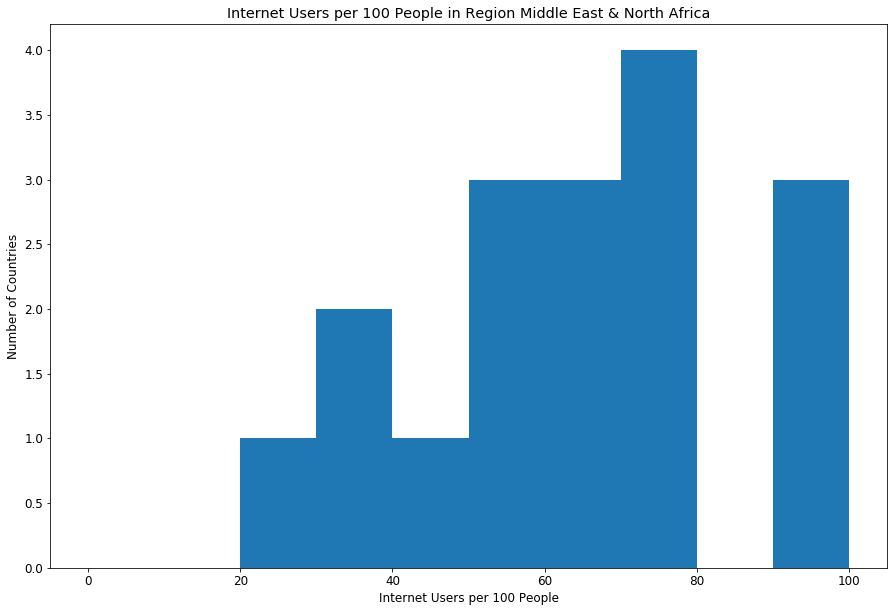

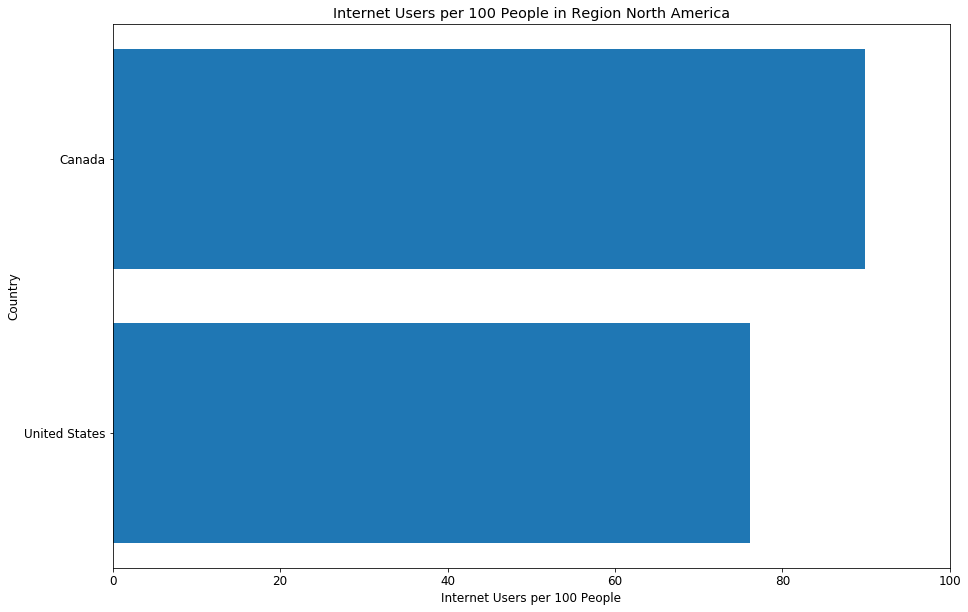

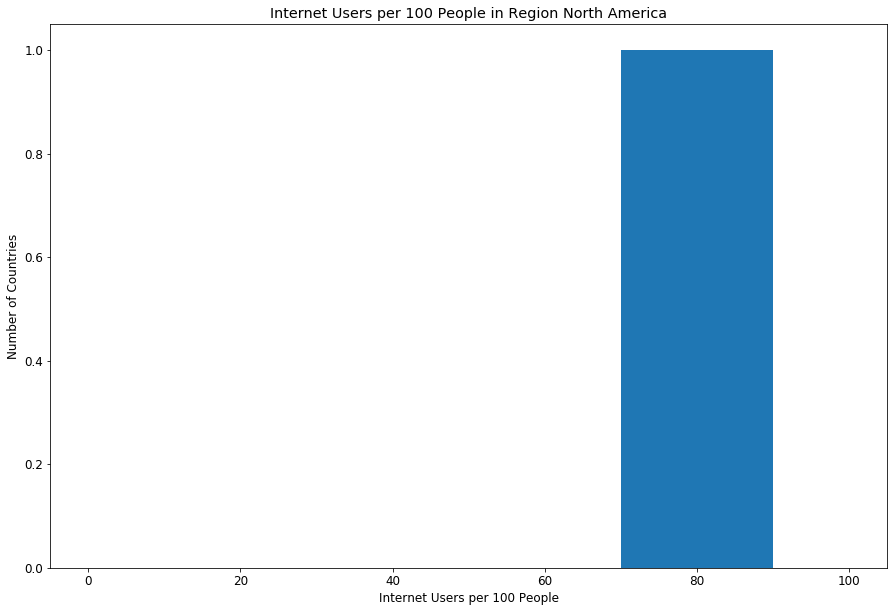

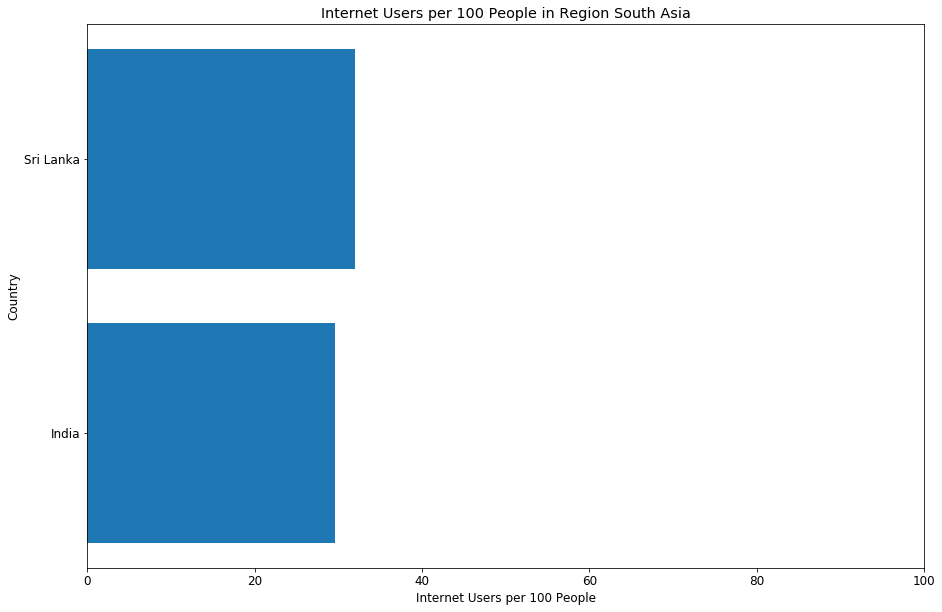

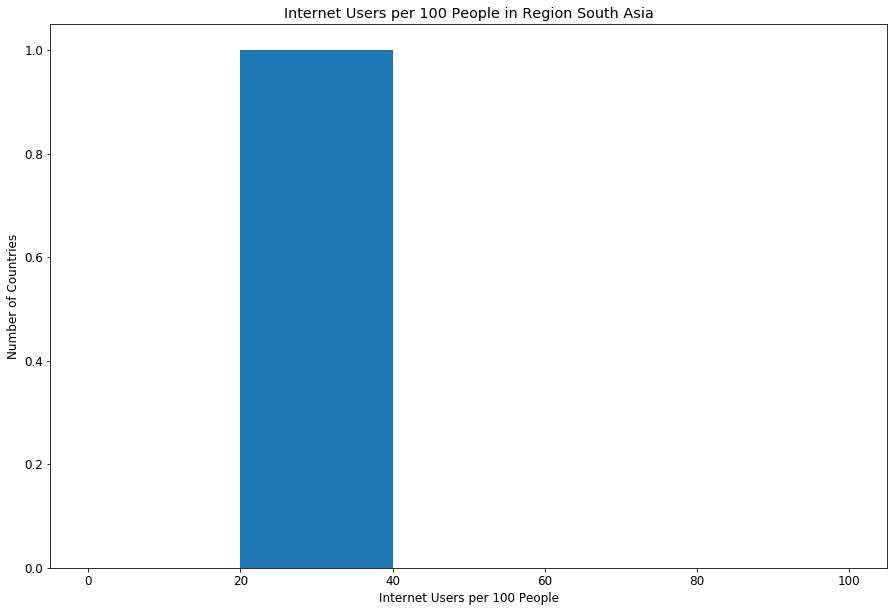

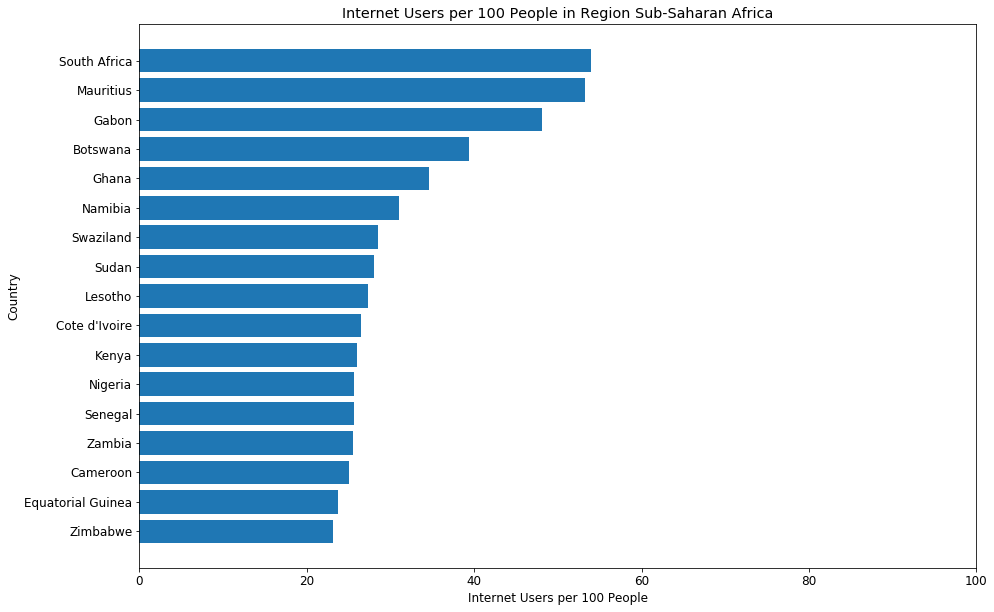

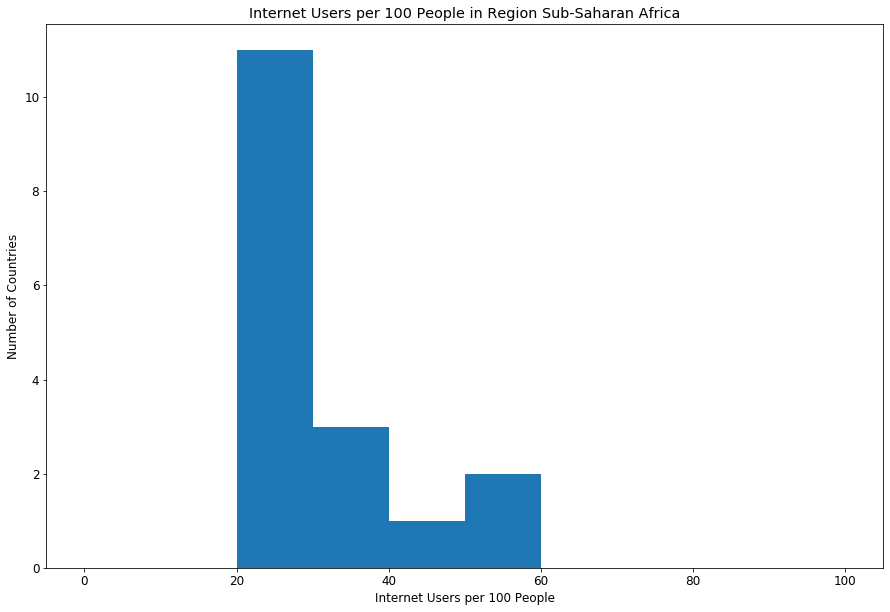

In [64]:
#Using a loop to generate a separate bar chart and histogram for each region that exists
for region in region_list: 
    #Creating pivot table to drill down on country level
    ind_internet_table2 = ind_internet.pivot_table('Value',['Region', 'Country Name'])
    
    #Filtering down on Region of choice
    ind_internet_table2 = ind_internet_table2.loc[region]

    #Visualizing on a horizontal bar chart
    y_pos = ind_internet_table2.sort_values(by = ['Value']).index
    internet_use = ind_internet_table2.sort_values(by = ['Value'])['Value']
    plt.barh(y_pos, internet_use, align='center')
    plt.xticks()
    plt.ylabel('Country')
    plt.xlabel('Internet Users per 100 People')
    plt.title(f'Internet Users per 100 People in Region {region}')
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    ax = plt.axes()
    ax.set_xbound(lower = 0, upper = 100)
    plt.show()
    
    #Visualizing on histograms
    ind_internet_table2.hist(bins = 10, range = [0, 100])
    plt.grid(b = None)
    plt.ylabel('Number of Countries')
    plt.xlabel('Internet Users per 100 People')
    plt.title(f'Internet Users per 100 People in Region {region}')
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

### Population

In [65]:
#Selecting Internet Users indicator for the year 2016
ind_population = past_data[(past_data['Indicator Name'] == 'Population, ages 15-64, total') & (past_data['Year'] == '2016')]

In [66]:
#Pivoting dataset
ind_population_table = ind_population.pivot_table('Value', 'Region', aggfunc = 'sum')

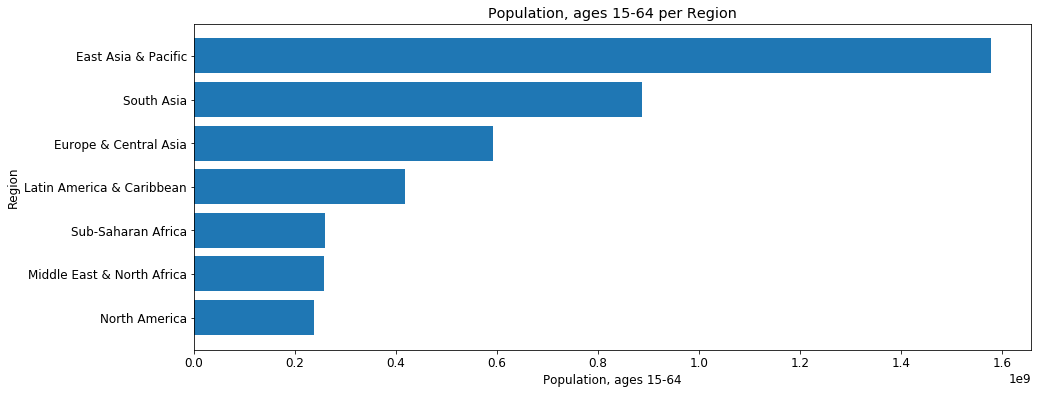

In [67]:
#Generating horizontal bar chart and sorting by the value of the 'Value' column
y_pos = ind_population_table.sort_values(by = ['Value']).index
population = ind_population_table.sort_values(by = ['Value'])['Value']

plt.barh(y_pos, population, align='center')
plt.xticks()
plt.ylabel('Region')
plt.xlabel('Population, ages 15-64')
plt.title('Population, ages 15-64 per Region')
fig = plt.gcf()
fig.set_size_inches(15, 6)

plt.show()

In [68]:
#Creating pivot table to drill down on country level
ind_population_table2 = ind_population.pivot_table('Value',['Region', 'Country Name'])

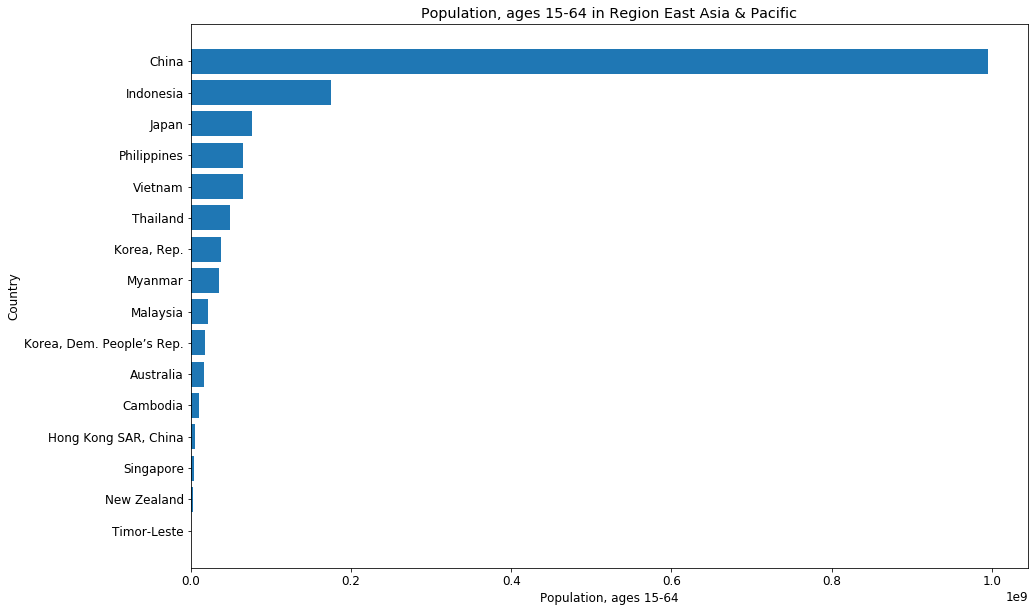

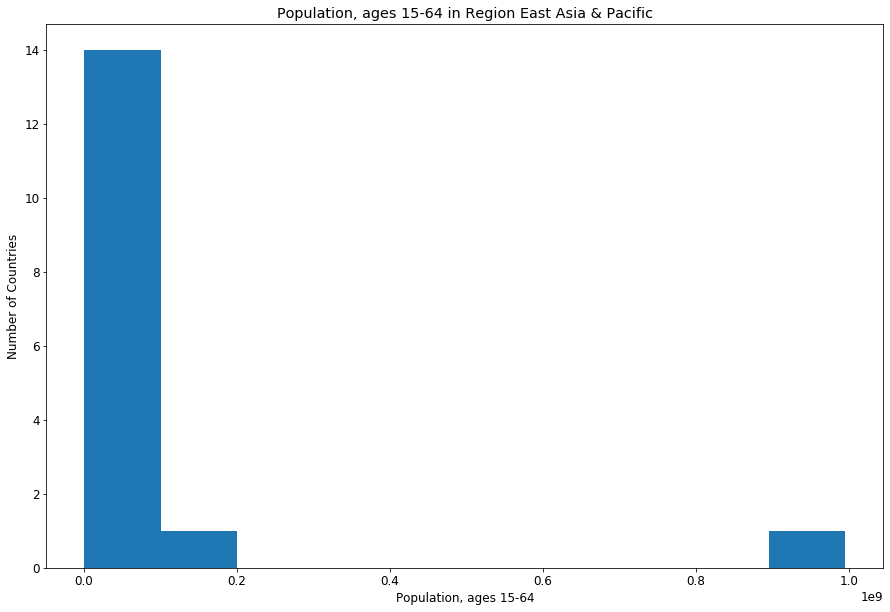

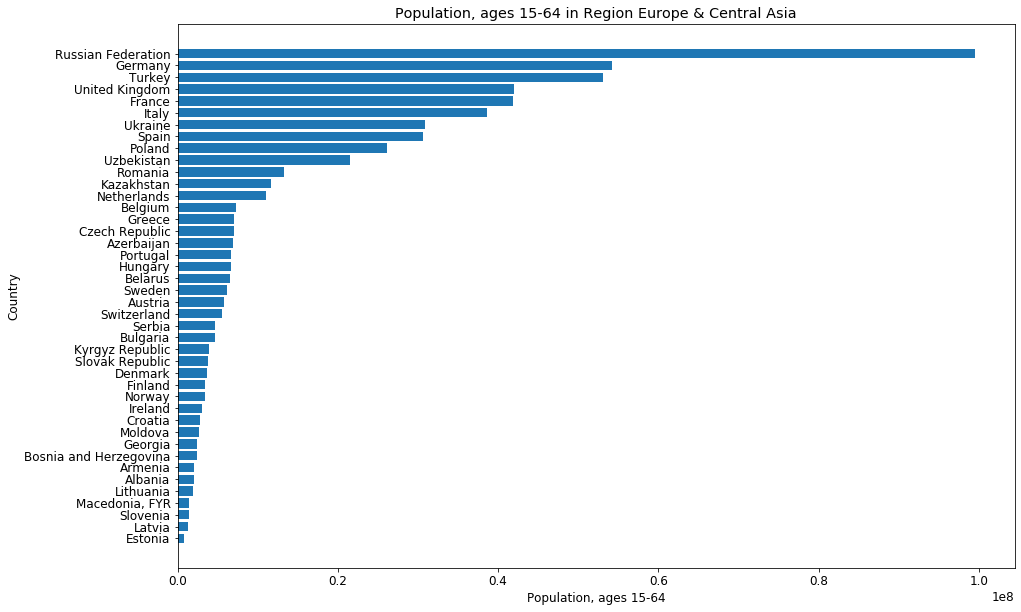

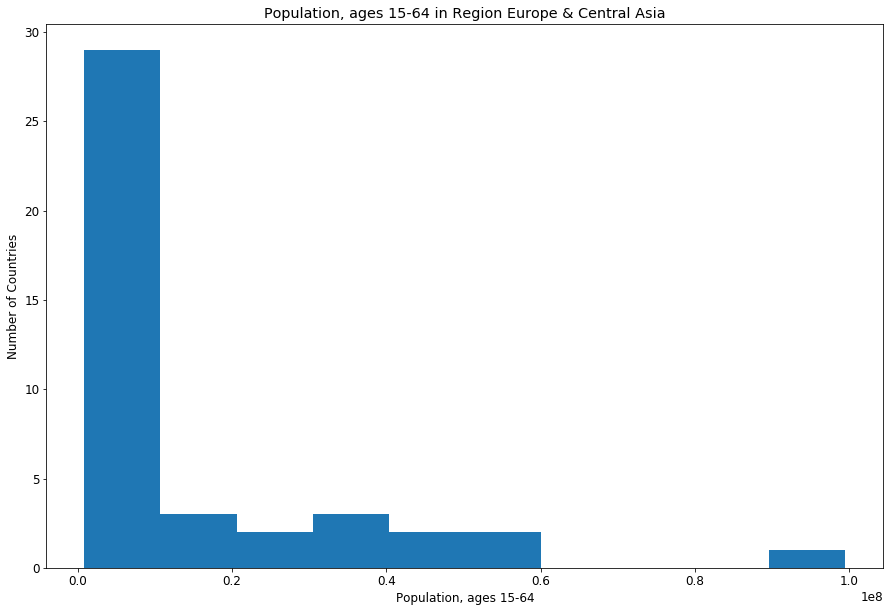

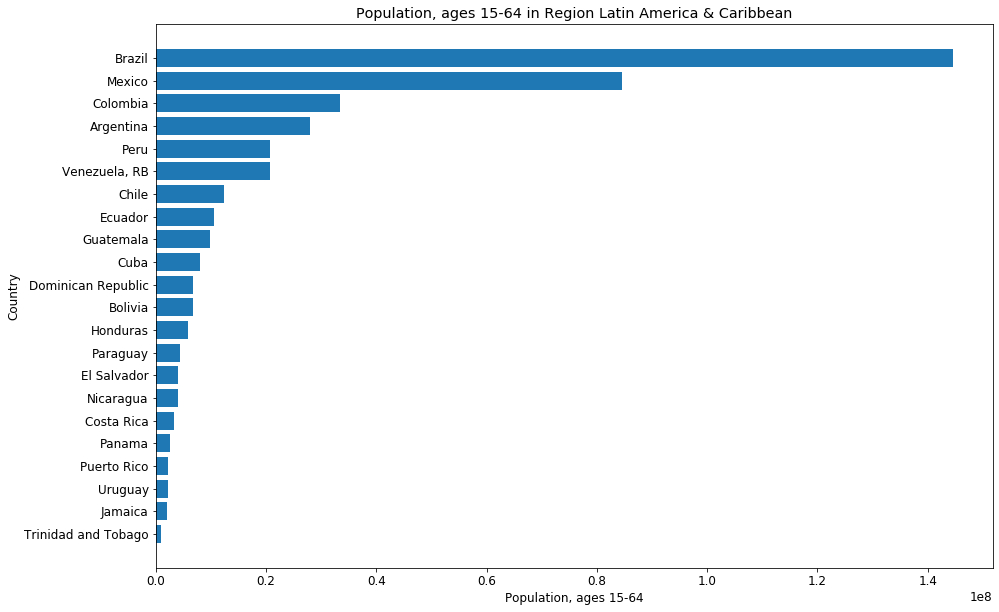

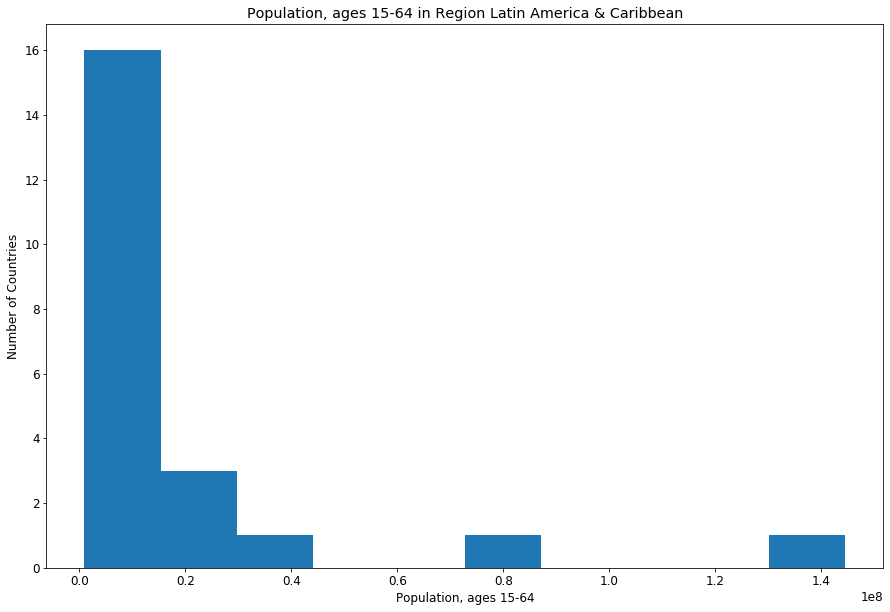

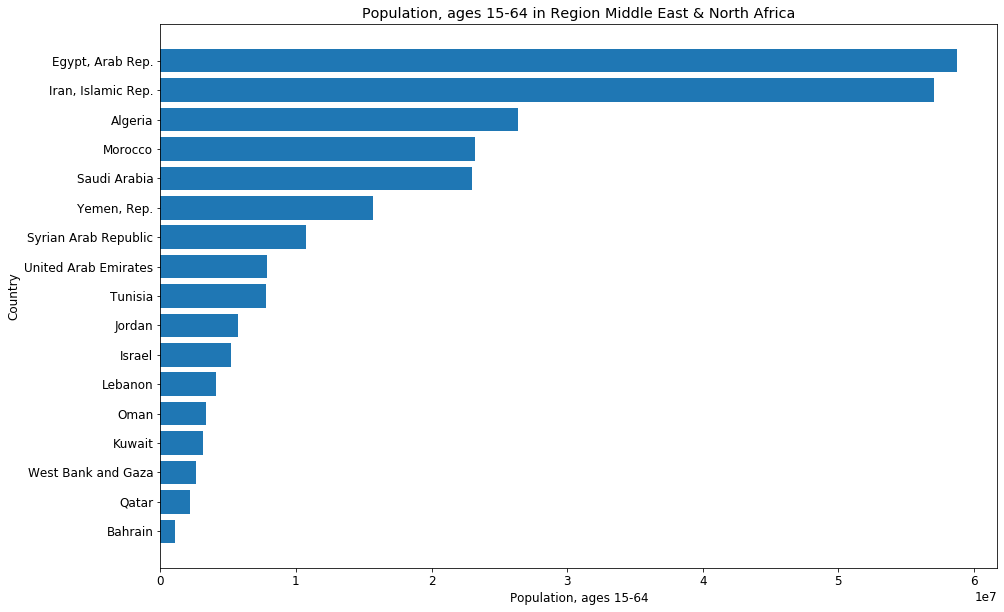

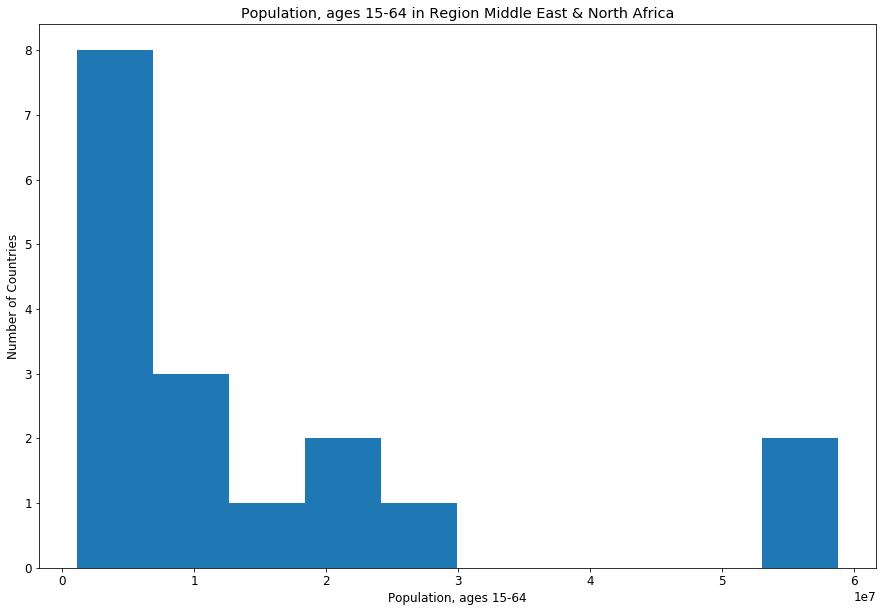

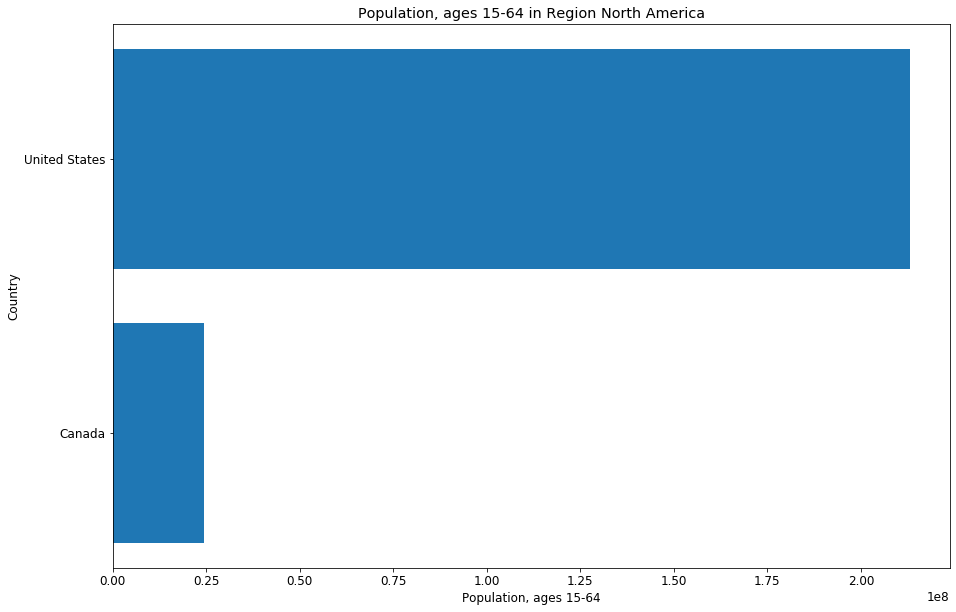

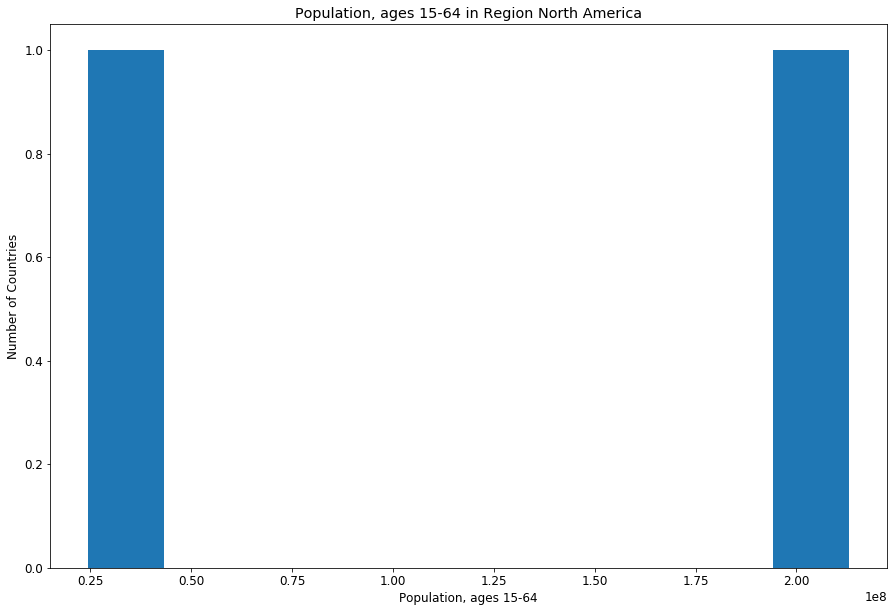

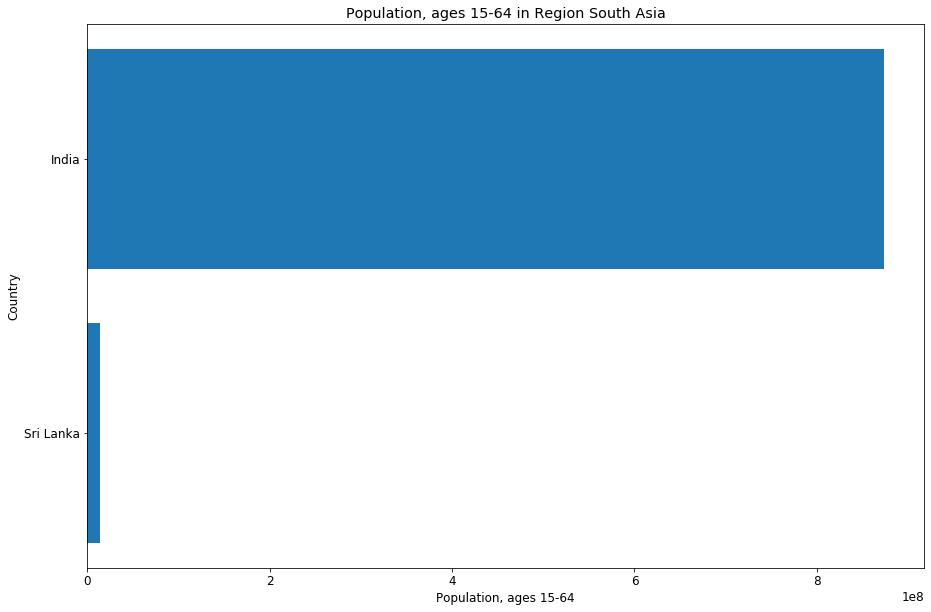

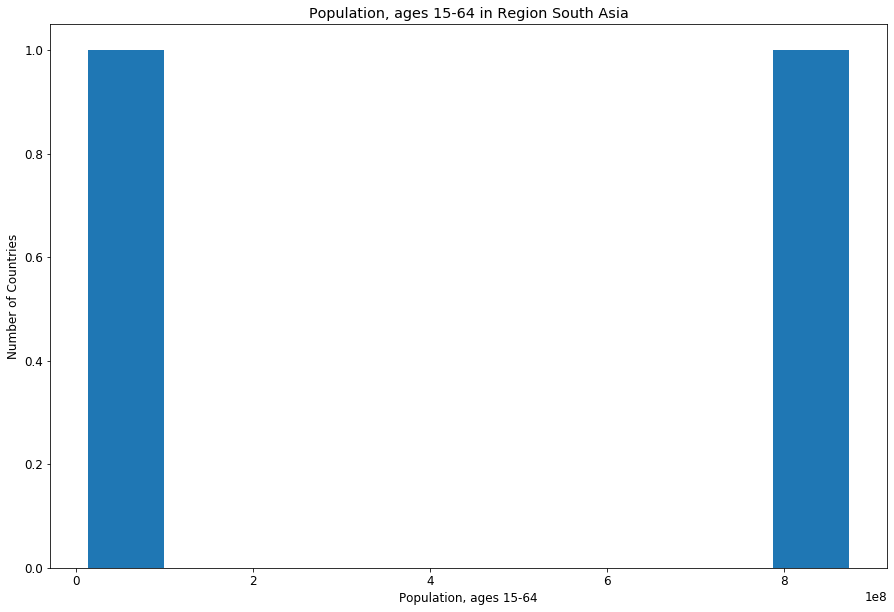

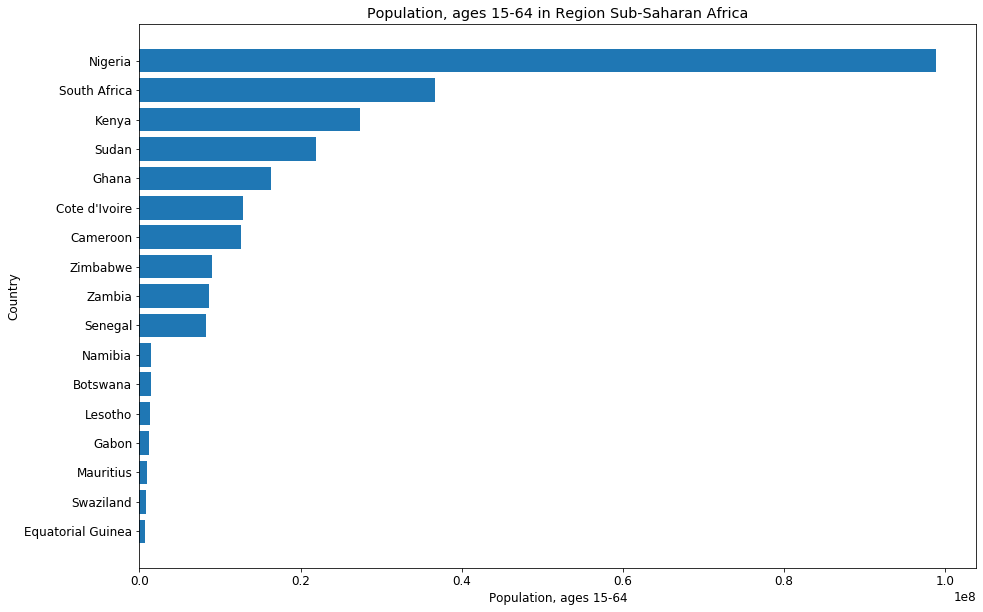

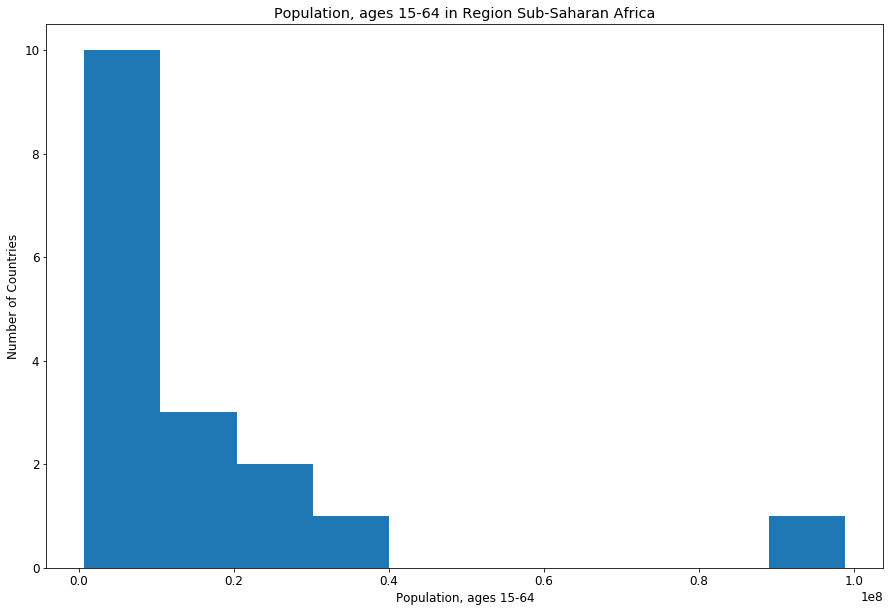

In [69]:
#Using a loop to generate a separate bar chart and histogram for each region that exists, re-using variable Region list from before
for region in region_list: 
    #Creating pivot table to drill down on country level
    ind_population_table2 = ind_population.pivot_table('Value',['Region', 'Country Name'])
    
    #Filtering down on Region of choice
    ind_population_table2 = ind_population_table2.loc[region]

    #Visualizing on a horizontal bar chart
    y_pos = ind_population_table2.sort_values(by = ['Value']).index
    population = ind_population_table2.sort_values(by = ['Value'])['Value']
    plt.barh(y_pos, population, align='center')
    plt.xticks()
    plt.ylabel('Country')
    plt.xlabel('Population, ages 15-64')
    plt.title(f'Population, ages 15-64 in Region {region}')
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()
    
    #Visualizing on histograms
    ind_population_table2.hist(bins = 10)
    plt.grid(b = None)
    plt.ylabel('Number of Countries')
    plt.xlabel('Population, ages 15-64')
    plt.title(f'Population, ages 15-64 in Region {region}')
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

### GDP

In [70]:
#Selecting Internet Users indicator for the year 2016
ind_gdp = past_data[(past_data['Indicator Name'] == 'GDP per capita (current US$)') & (past_data['Year'] == '2016')]

In [71]:
#Pivoting dataset
ind_gdp_table = ind_gdp.pivot_table('Value', 'Region')

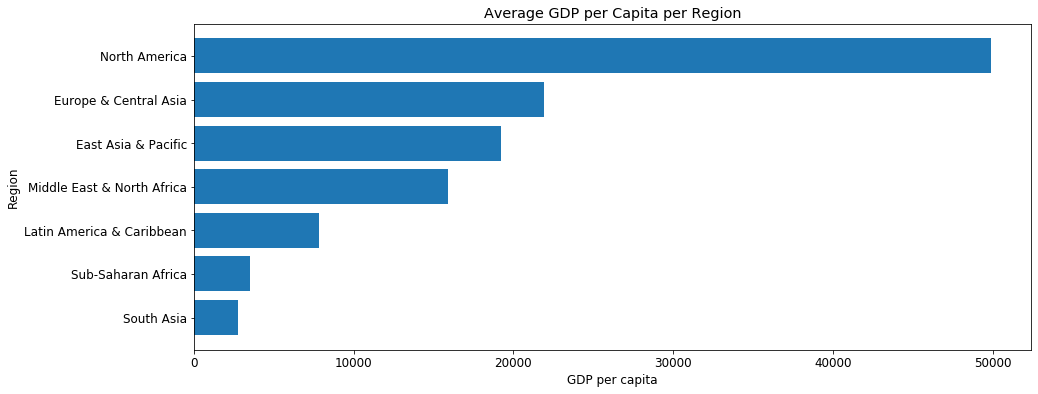

In [72]:
#Generating horizontal bar chart and sorting by the value of the 'Value' column
y_pos = ind_gdp_table.sort_values(by = ['Value']).index
gdp = ind_gdp_table.sort_values(by = ['Value'])['Value']

plt.barh(y_pos, gdp, align='center')
plt.xticks()
plt.ylabel('Region')
plt.xlabel('GDP per capita')
plt.title('Average GDP per Capita per Region')
fig = plt.gcf()
fig.set_size_inches(15, 6)

plt.show()

In [73]:
#Creating pivot table to drill down on country level
ind_gdp_table2 = ind_gdp.pivot_table('Value',['Region', 'Country Name'])

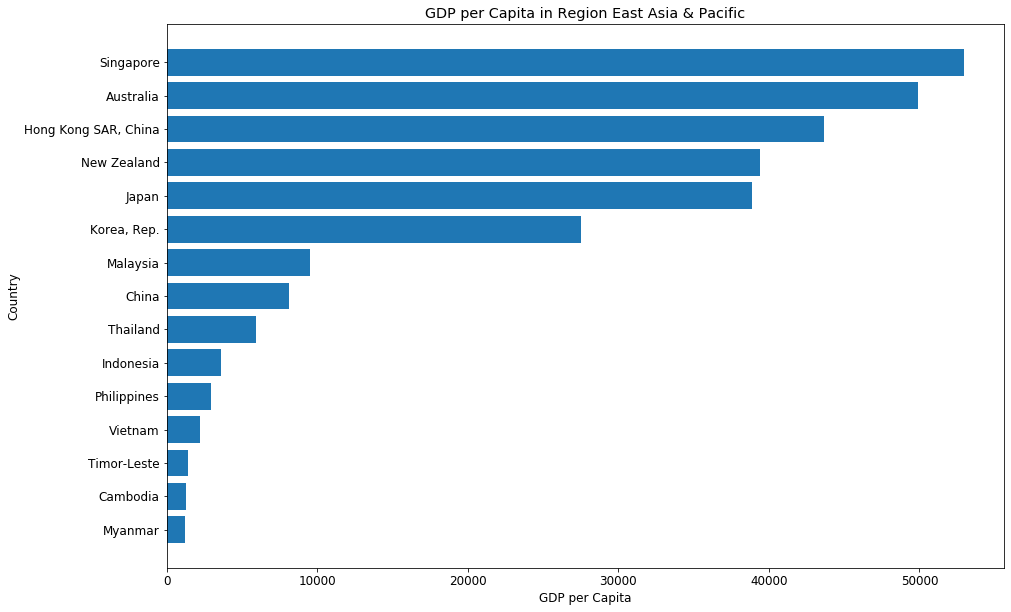

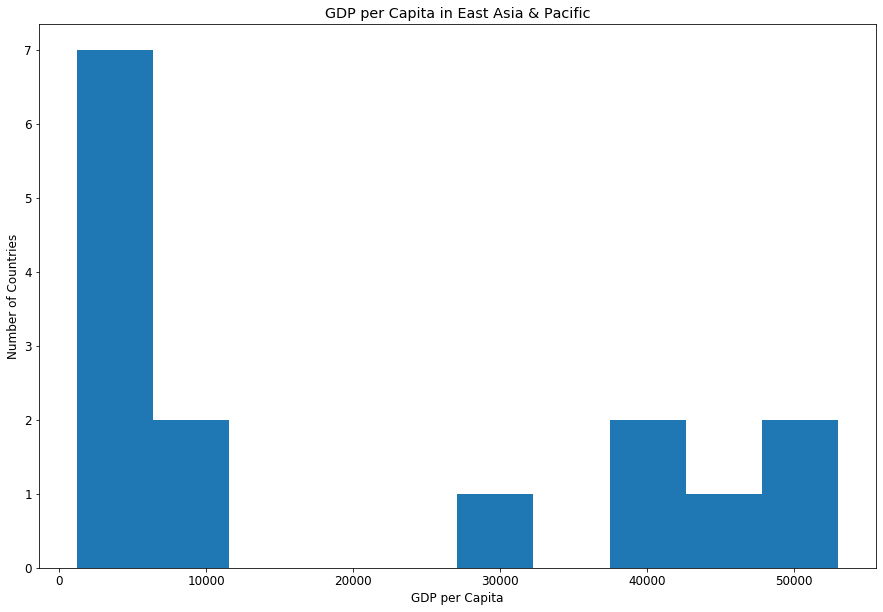

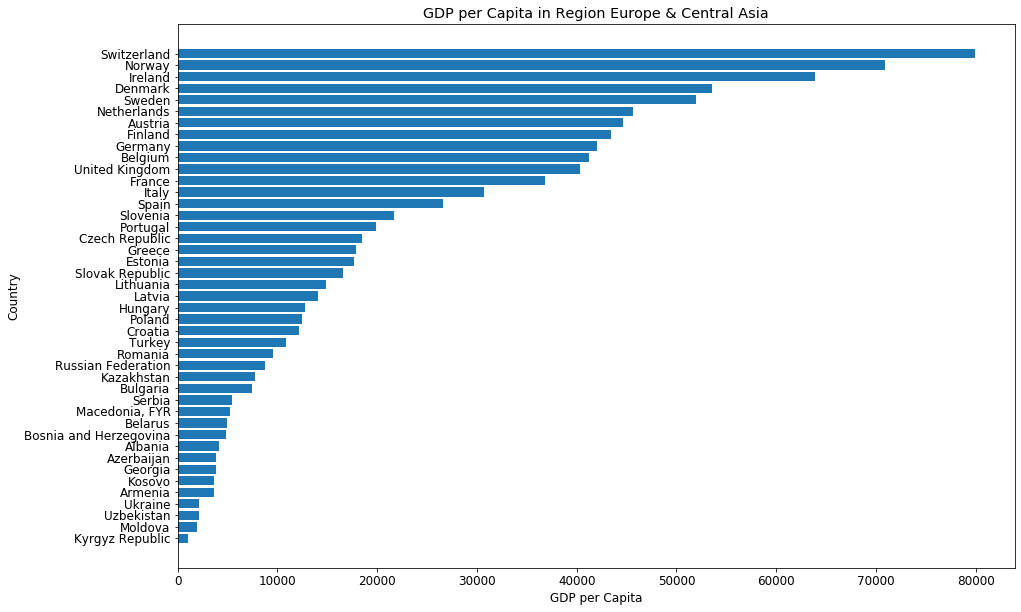

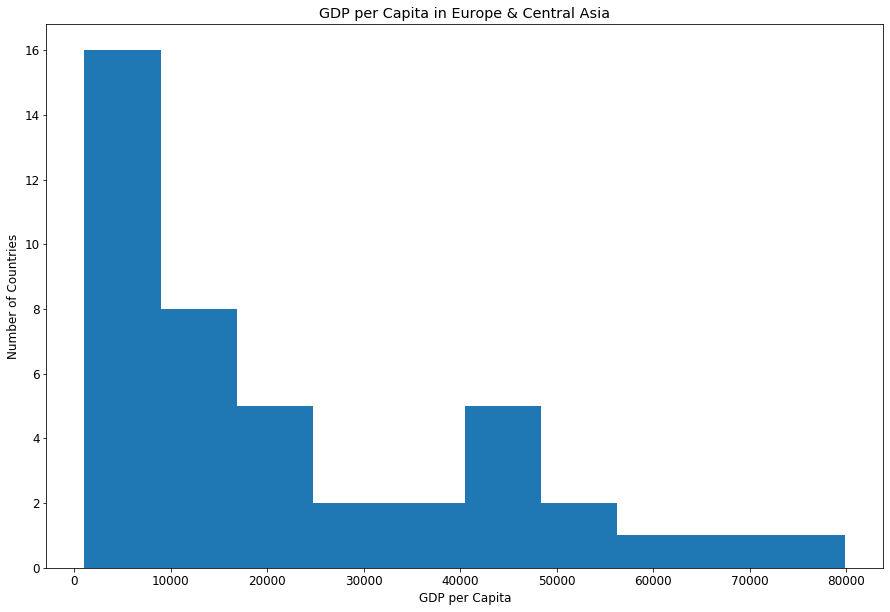

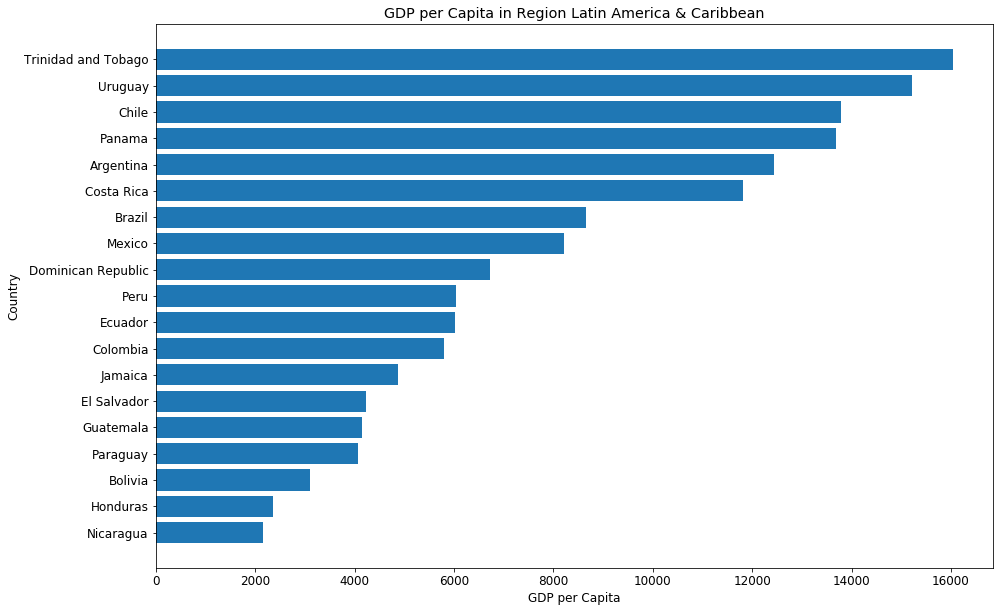

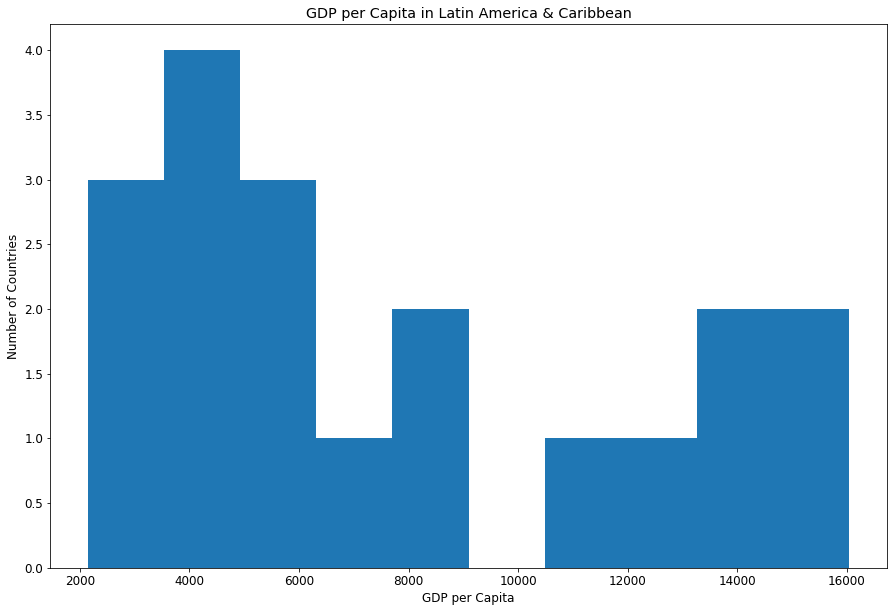

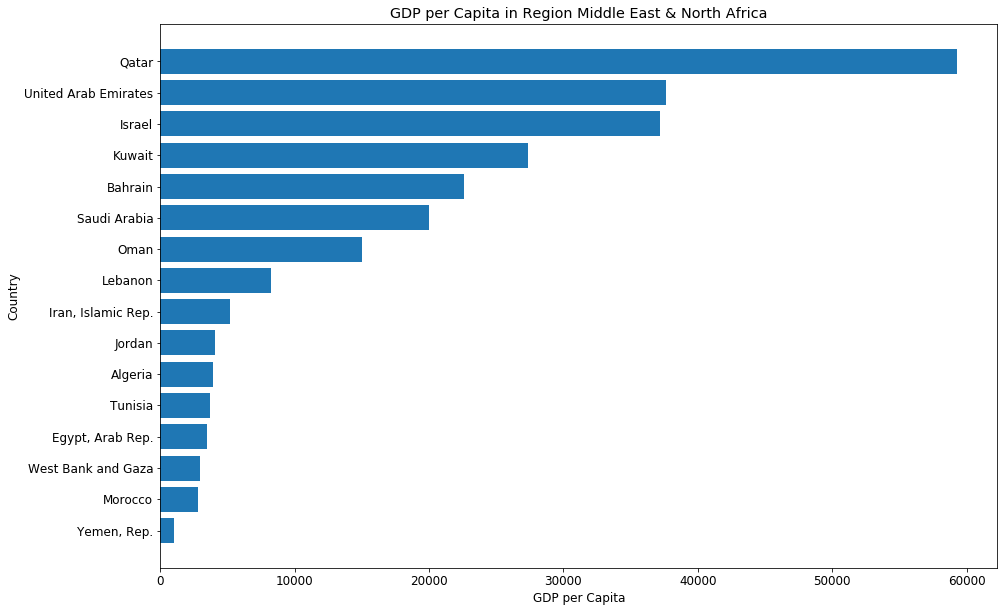

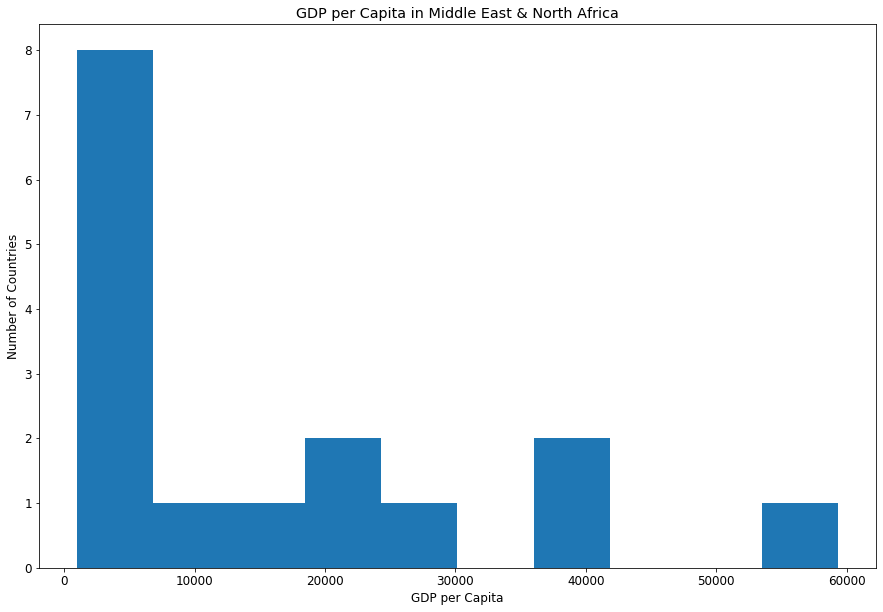

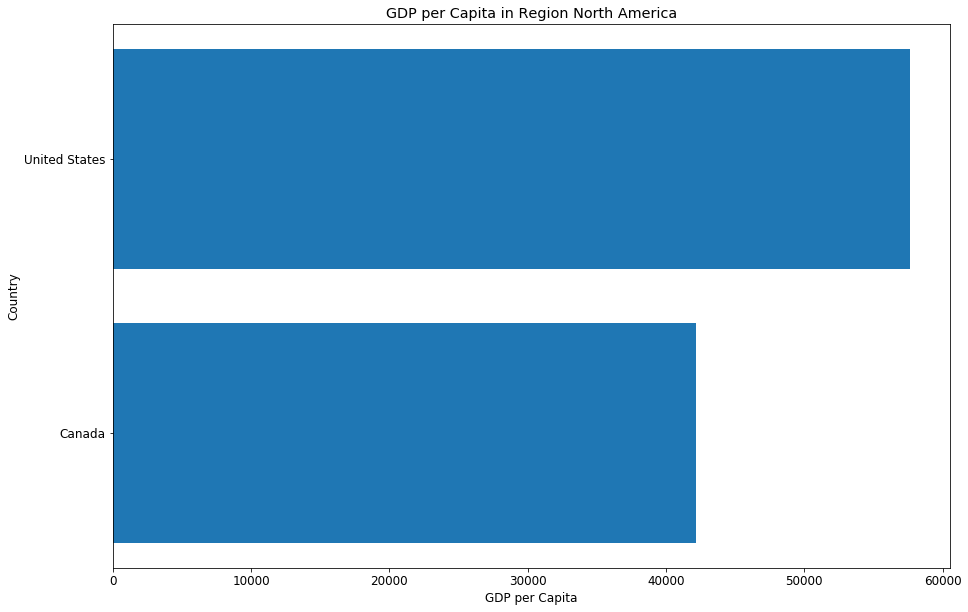

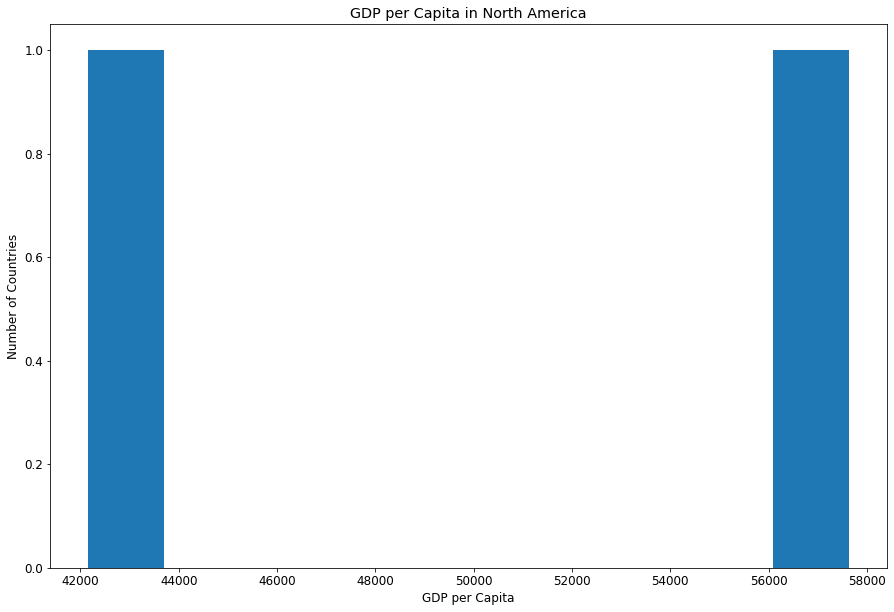

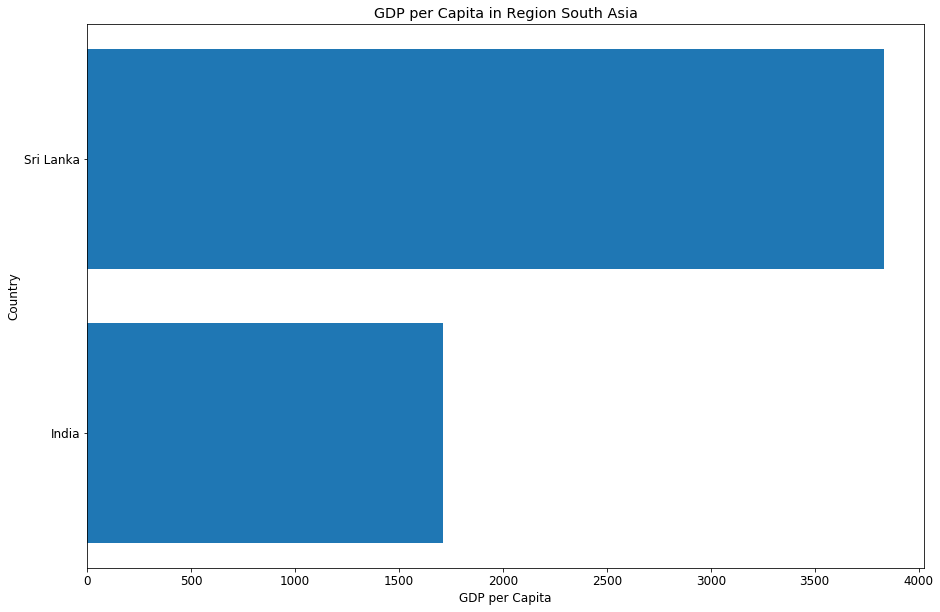

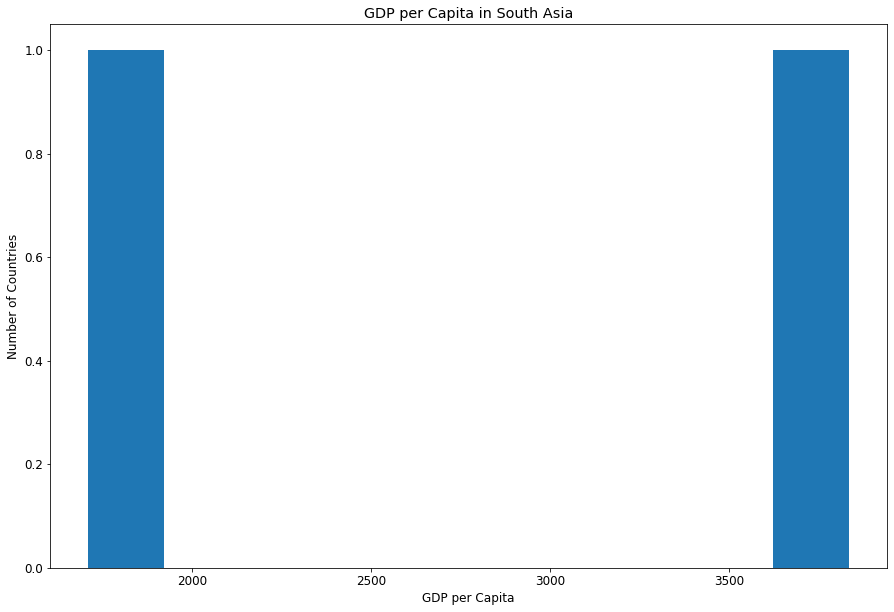

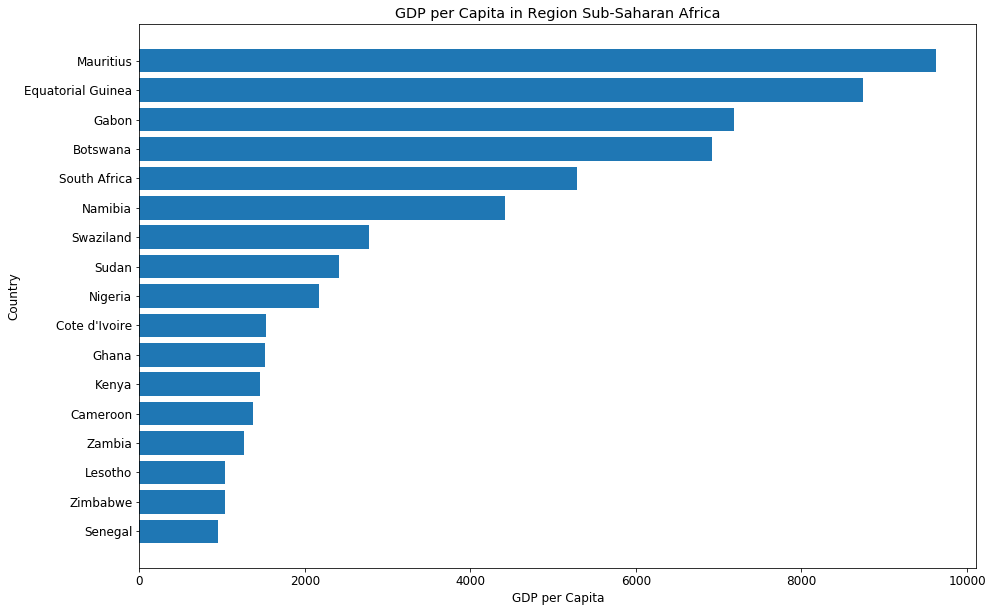

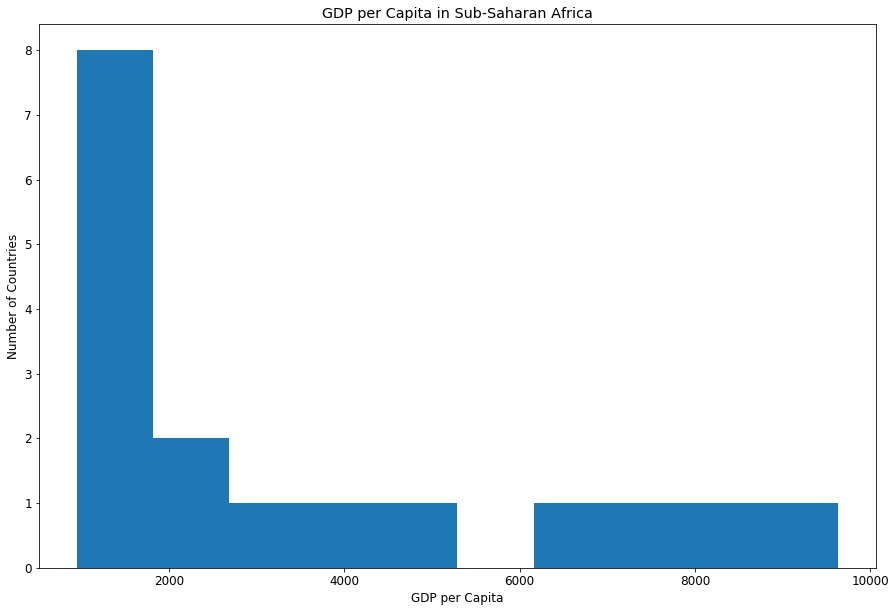

In [74]:
#Using a loop to generate a separate bar chart and histogram for each region that exists, re-using variable Region list from before
for region in region_list: 
    #Creating pivot table to drill down on country level
    ind_gdp_table2 = ind_gdp.pivot_table('Value',['Region', 'Country Name'])
    
    #Filtering down on Region of choice
    ind_gdp_table2 = ind_gdp_table2.loc[region]

    #Visualizing on a horizontal bar chart
    y_pos = ind_gdp_table2.sort_values(by = ['Value']).index
    gdp = ind_gdp_table2.sort_values(by = ['Value'])['Value']
    plt.barh(y_pos, gdp, align='center')
    plt.xticks()
    plt.ylabel('Country')
    plt.xlabel('GDP per Capita')
    plt.title(f'GDP per Capita in Region {region}')
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()
    
    #Visualizing on histograms
    ind_gdp_table2.hist(bins = 10)
    plt.grid(b = None)
    plt.ylabel('Number of Countries')
    plt.xlabel('GDP per Capita')
    plt.title(f'GDP per Capita in {region}')
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

In [75]:
#Make pivot with countries regardless of region
ind_gdp_table3 = ind_gdp.pivot_table('Value', 'Country Name').reset_index()

In [76]:
#Make list with top 10 countries regardless of region
top10_ind_gdp = ind_gdp.pivot_table('Value', 'Country Name').nlargest(10, 'Value').index.tolist()

In [77]:
#Keep only rows with country names found in the list created above
top10_ind_gdp_graph = ind_gdp_table3.loc[ind_gdp_table3['Country Name'].isin(top10_ind_gdp)]

In [78]:
#Make pivot with top 10 countries and their population
top10_ind_gdp_graph = top10_ind_gdp_graph.pivot_table('Value', 'Country Name')

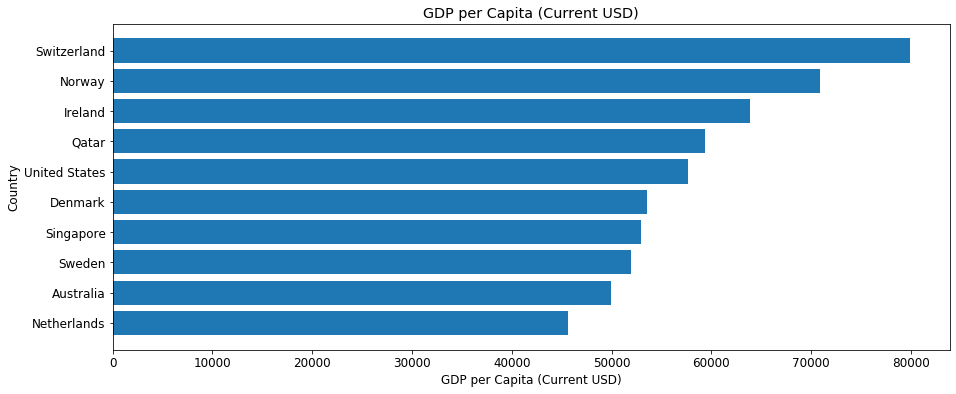

In [79]:
#Generating horizontal bar chart and sorting by the value of the 'Value' column
y_pos = top10_ind_gdp_graph.sort_values(by = ['Value']).index
x = top10_ind_gdp_graph.sort_values(by = ['Value'])['Value']

plt.barh(y_pos, x, align='center')
plt.xticks()
plt.ylabel('Country')
plt.xlabel('GDP per Capita (Current USD)')
plt.title('GDP per Capita (Current USD)')
fig = plt.gcf()
fig.set_size_inches(15, 6)

plt.show()

### Internet Population (Internet Users per 100 * Population)

In [80]:
#Combining population and internet usage into a single dataset
internet_population = pd.merge(ind_internet, ind_population, left_on = "Country Code", right_on = "Country Code", how = 'left')

In [81]:
#Multiplying internet users per 100 by population
internet_population["Internet Population"] = ((internet_population["Value_x"]/100) * internet_population["Value_y"])

In [82]:
#Making a pivot table of internet users by region
internet_population_table = internet_population.pivot_table('Internet Population', 'Region_x', aggfunc = 'sum')

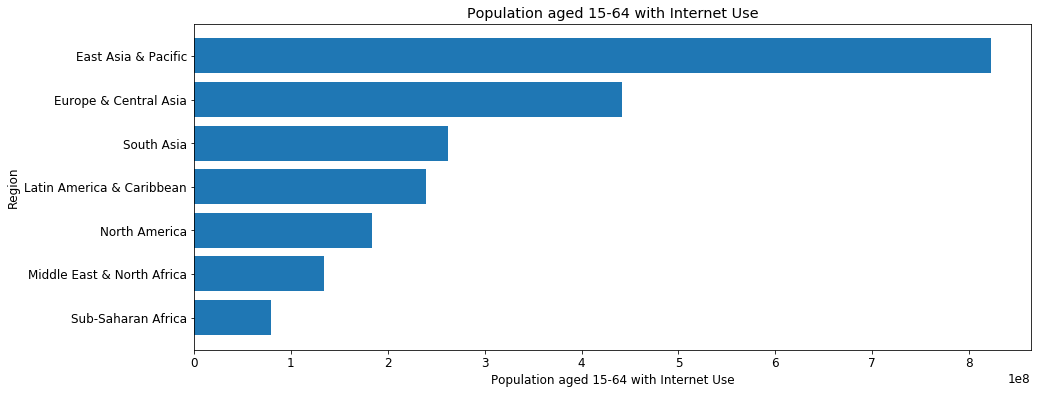

In [83]:
#Generating horizontal bar chart and sorting by the value of the 'Internet Population' column
y_pos = internet_population_table.sort_values(by = ['Internet Population']).index
int_pop = internet_population_table.sort_values(by = ['Internet Population'])['Internet Population']

plt.barh(y_pos, int_pop, align='center')
plt.xticks()
plt.ylabel('Region')
plt.xlabel('Population aged 15-64 with Internet Use')
plt.title('Population aged 15-64 with Internet Use')
fig = plt.gcf()
fig.set_size_inches(15, 6)

plt.show()

In [84]:
#Creating pivot table to drill down on country level
int_pop_table2 = internet_population.pivot_table('Internet Population',['Region_x', 'Country Name_x'])

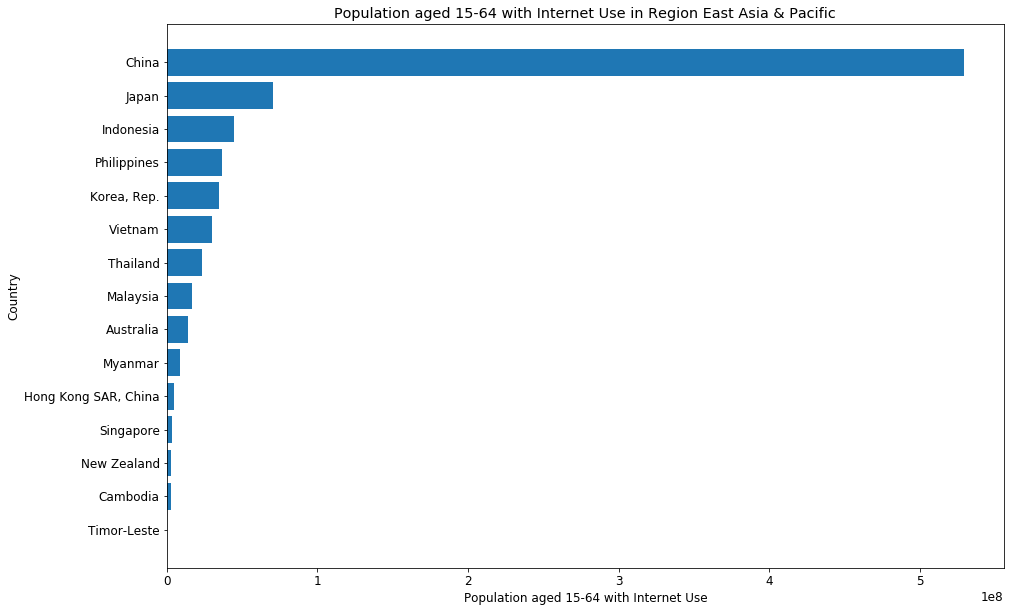

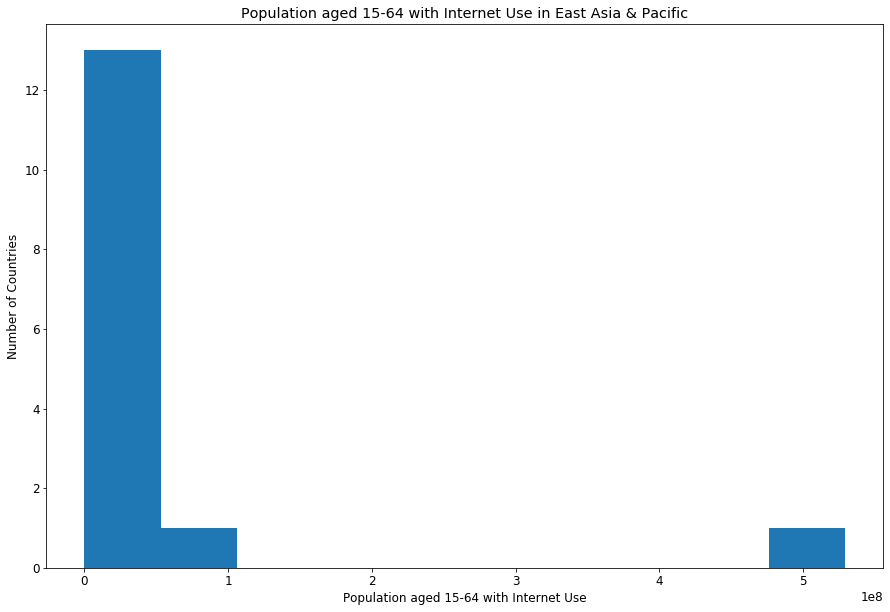

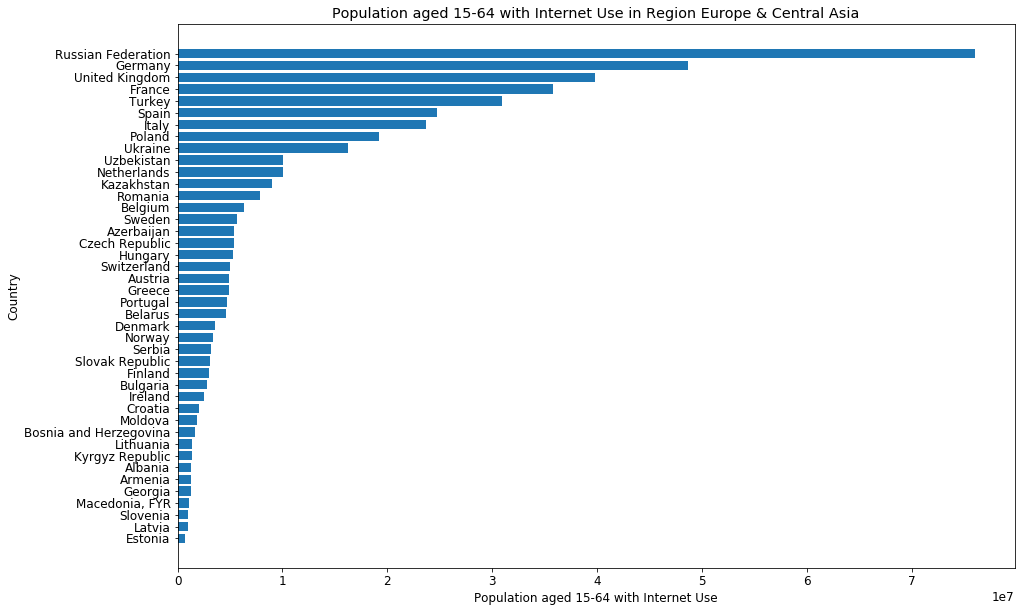

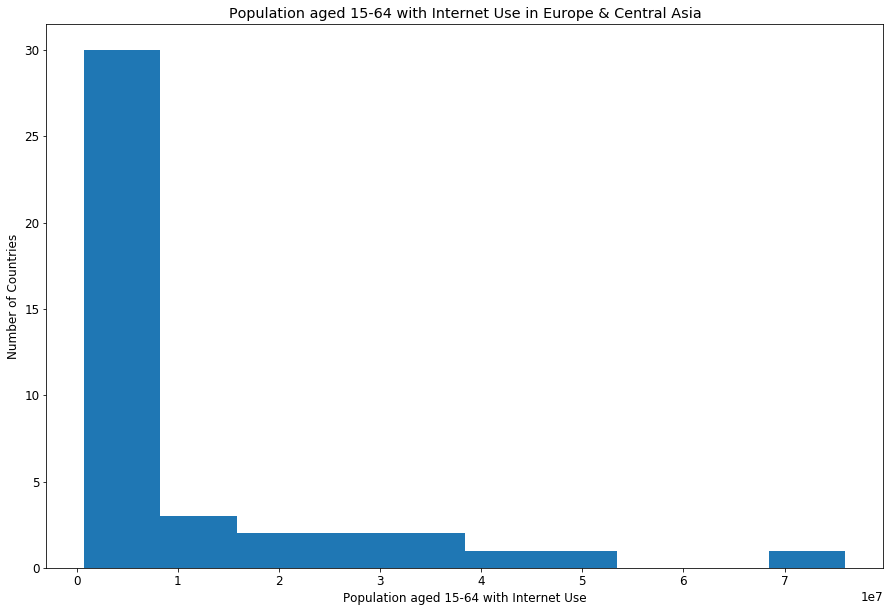

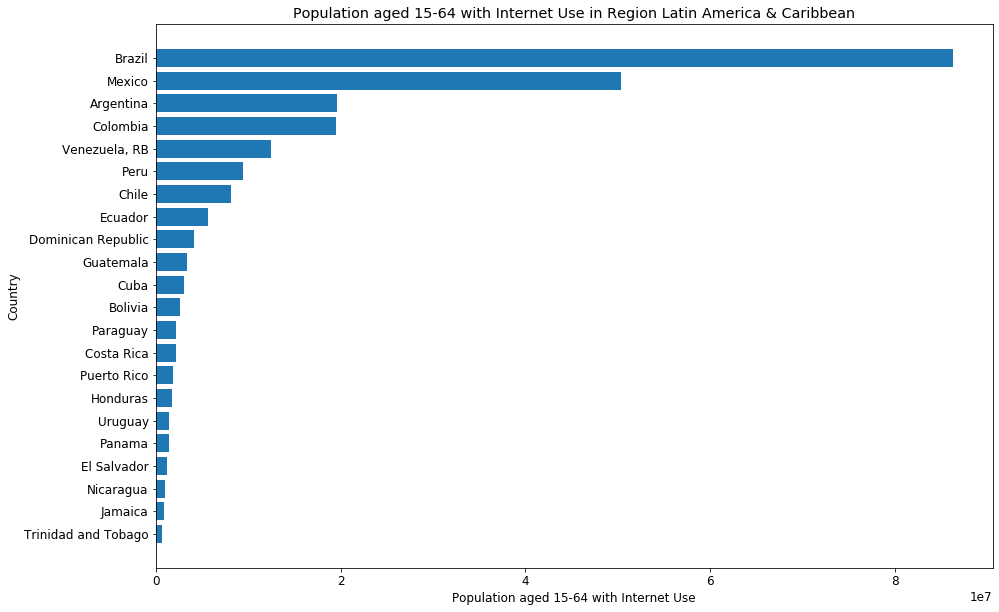

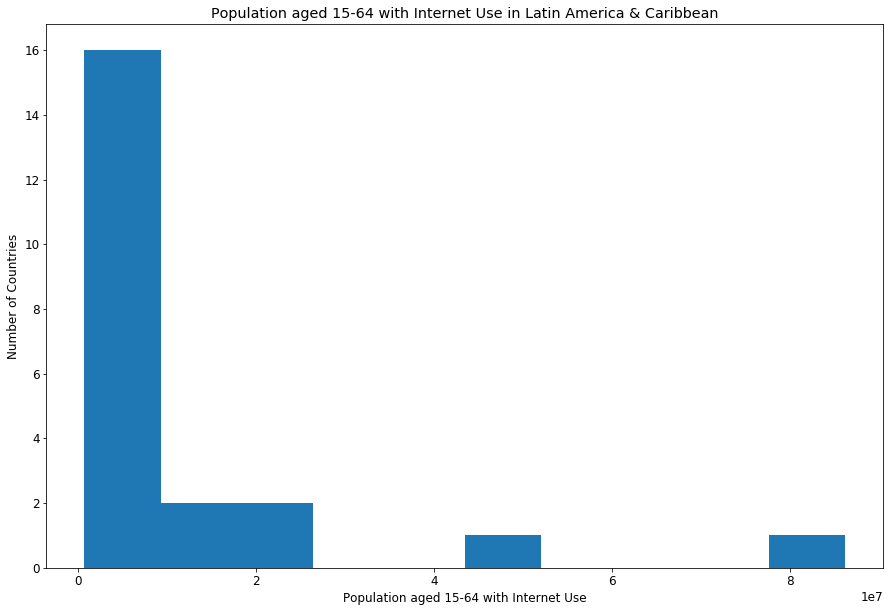

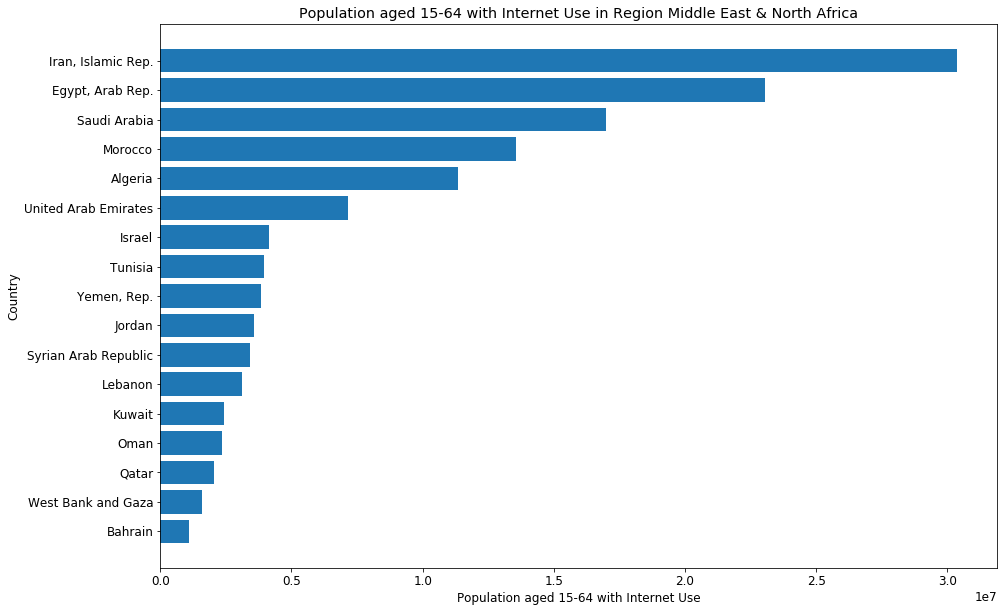

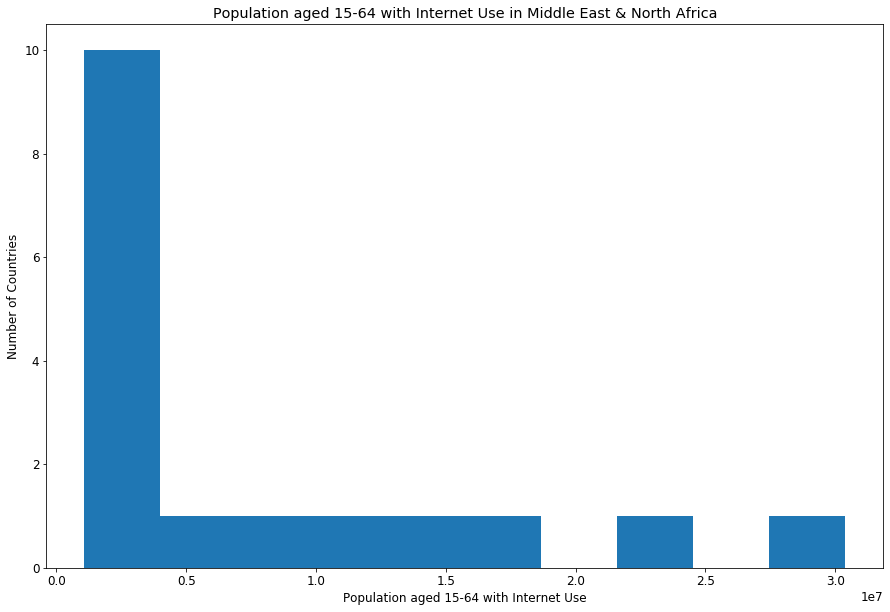

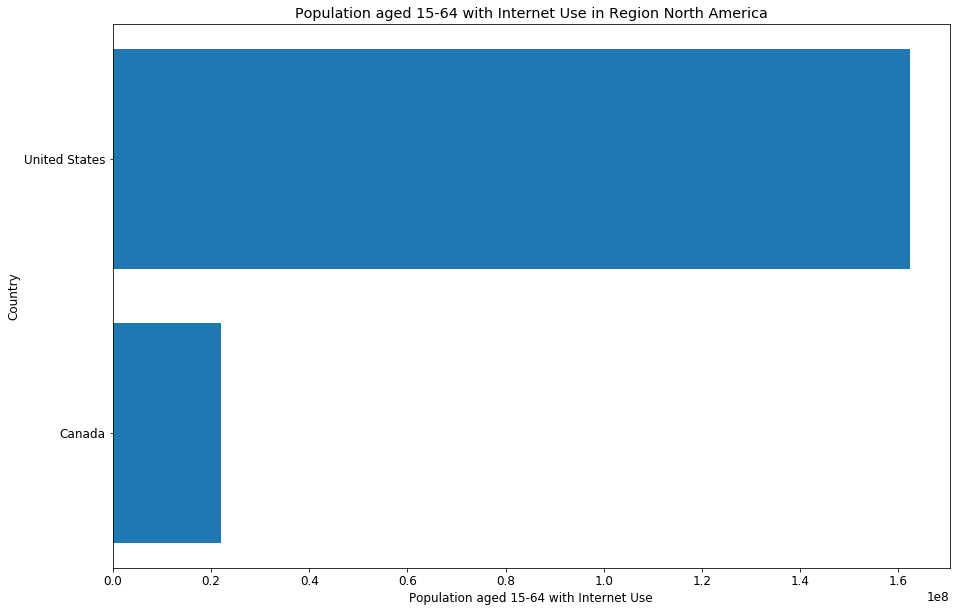

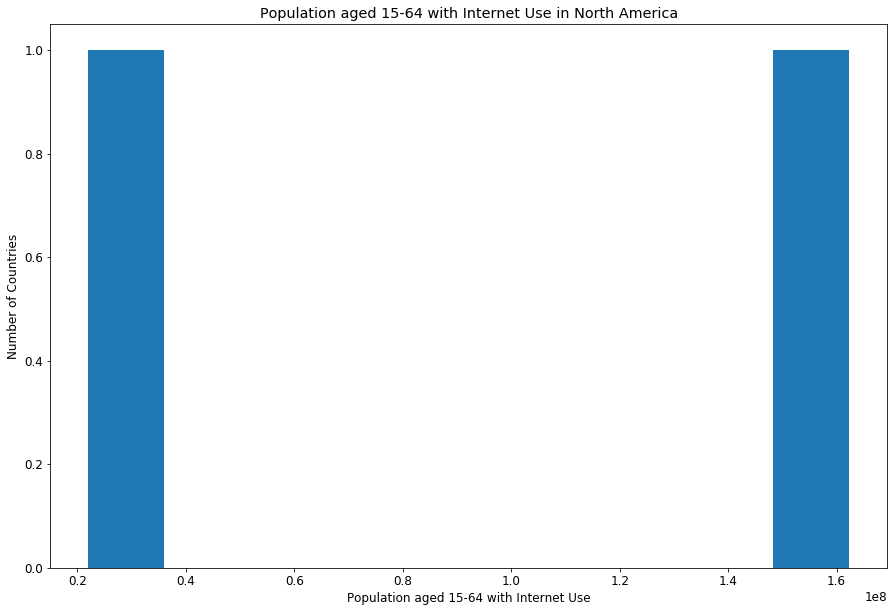

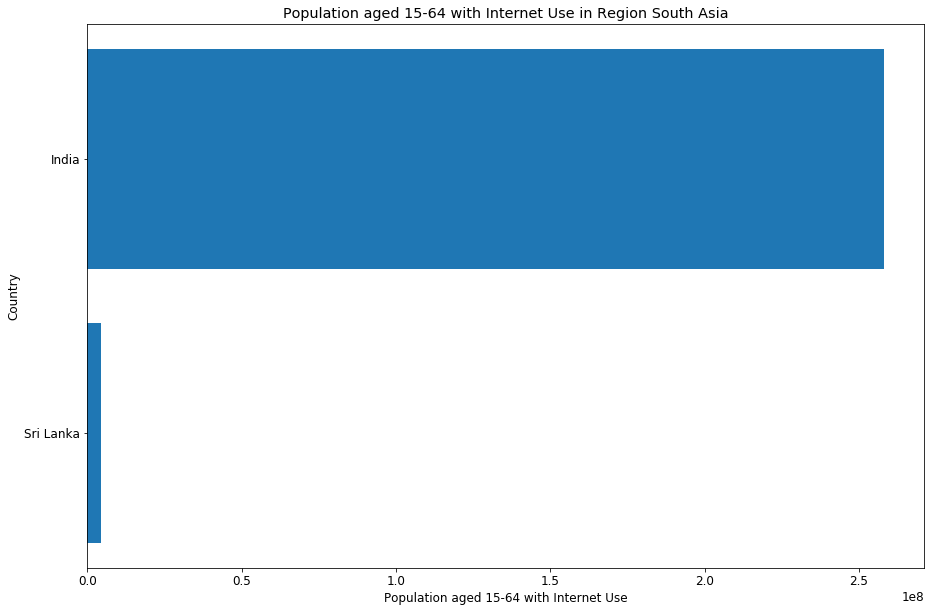

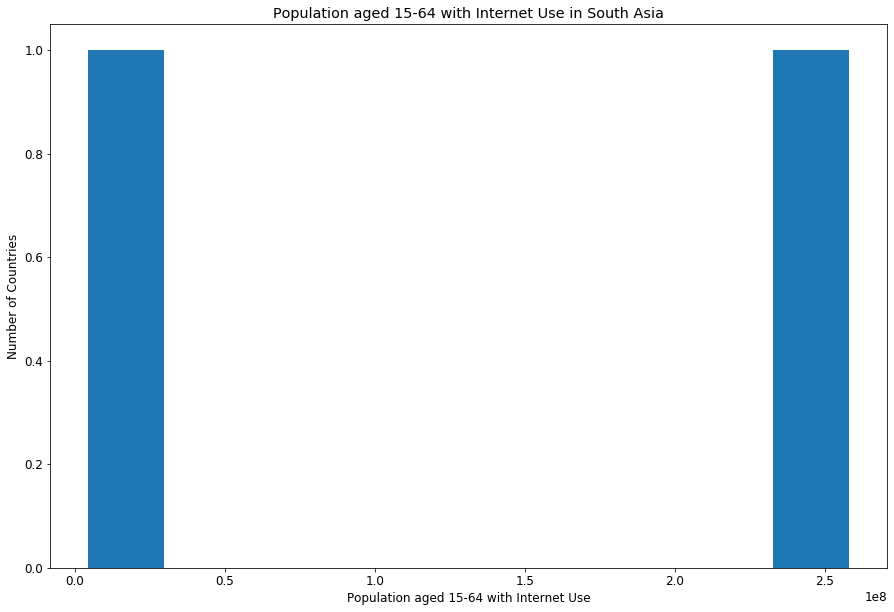

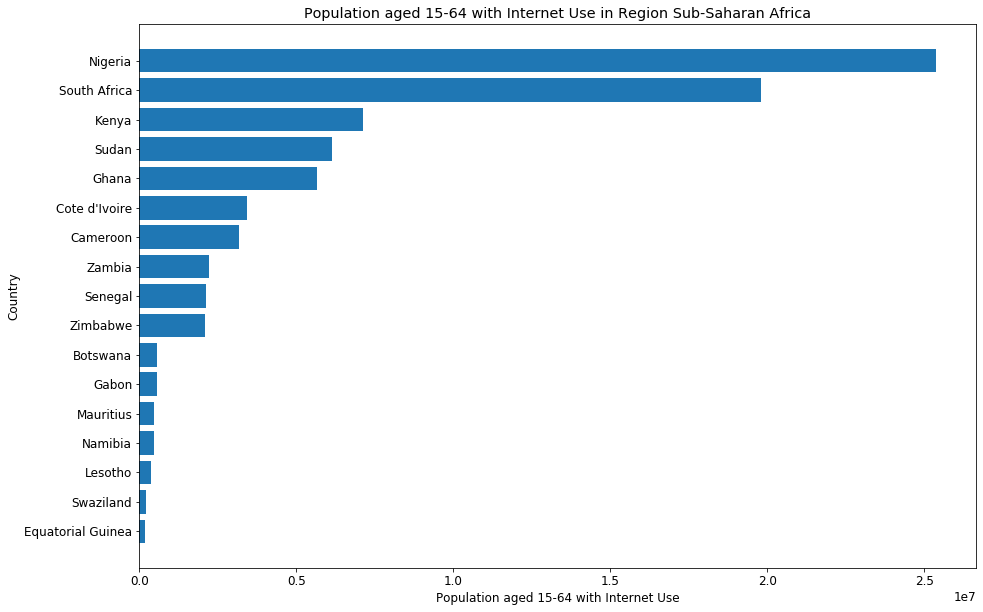

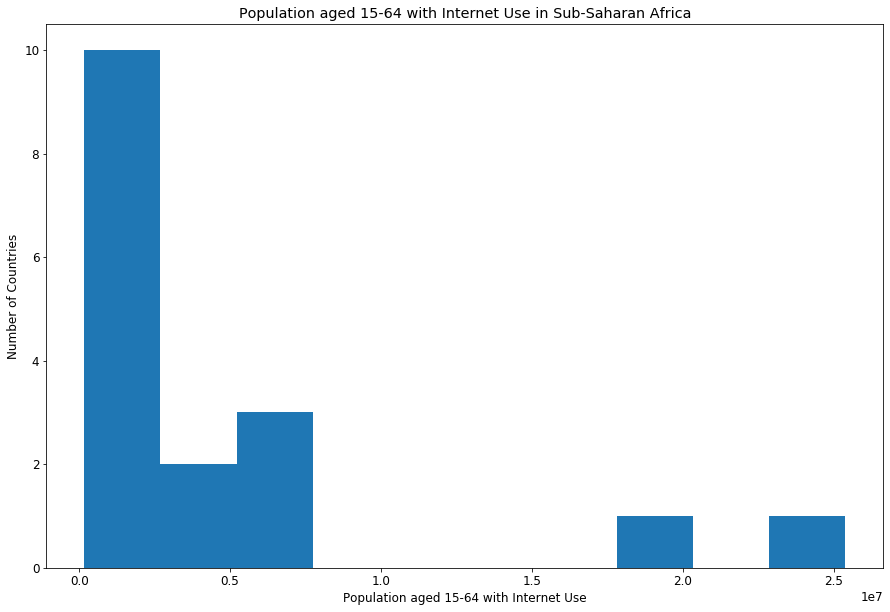

In [85]:
#Using a loop to generate a separate bar chart and histogram for each region that exists, re-using variable Region list from before
for region in region_list: 
    #Creating pivot table to drill down on country level
    int_pop_table2 = internet_population.pivot_table('Internet Population',['Region_x', 'Country Name_x'])
    
    #Filtering down on Region of choice
    int_pop_table2 = int_pop_table2.loc[region]

    #Visualizing on a horizontal bar chart
    y_pos = int_pop_table2.sort_values(by = ['Internet Population']).index
    int_pop = int_pop_table2.sort_values(by = ['Internet Population'])['Internet Population']
    plt.barh(y_pos, int_pop, align='center')
    plt.xticks()
    plt.ylabel('Country')
    plt.xlabel('Population aged 15-64 with Internet Use')
    plt.title(f'Population aged 15-64 with Internet Use in Region {region}')
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()
    
    #Visualizing on histograms
    int_pop_table2.hist(bins = 10)
    plt.grid(b = None)
    plt.ylabel('Number of Countries')
    plt.xlabel('Population aged 15-64 with Internet Use')
    plt.title(f'Population aged 15-64 with Internet Use in {region}')
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

In [86]:
#Make pivot with countries regardless of region
int_pop_table3 = internet_population.pivot_table('Internet Population', 'Country Name_x').reset_index()

In [87]:
#Make list with top 10 countries regardless of region
top10_int_pop = internet_population.pivot_table('Internet Population', 'Country Name_x').nlargest(10, 'Internet Population').index.tolist()

In [88]:
#Keep only rows with country names found in the list created above
top10_int_pop_graph = int_pop_table3.loc[int_pop_table3['Country Name_x'].isin(top10_int_pop)]

In [89]:
#Make pivot with top 10 countries and their population
top10_int_pop_graph = top10_int_pop_graph.pivot_table('Internet Population', 'Country Name_x')

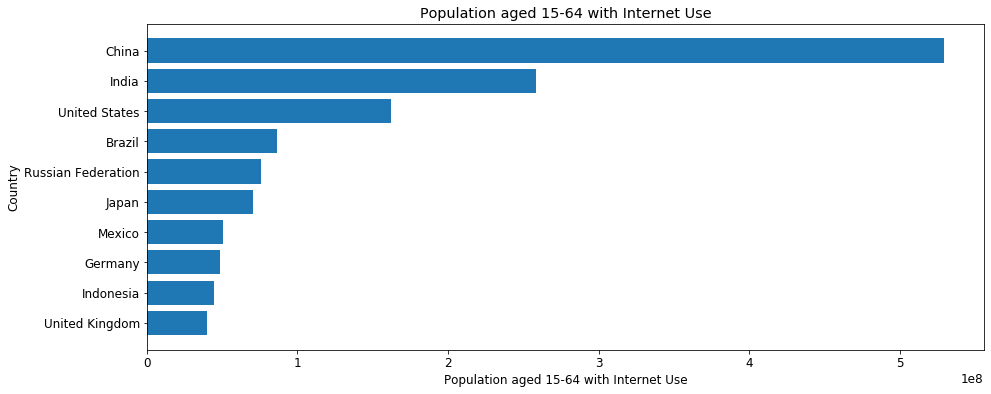

In [90]:
#Generating horizontal bar chart and sorting by the value of the 'Internet Population' column
y_pos = top10_int_pop_graph.sort_values(by = ['Internet Population']).index
x = top10_int_pop_graph.sort_values(by = ['Internet Population'])['Internet Population']

plt.barh(y_pos, x, align='center')
plt.xticks()
plt.ylabel('Country')
plt.xlabel('Population aged 15-64 with Internet Use')
plt.title('Population aged 15-64 with Internet Use')
fig = plt.gcf()
fig.set_size_inches(15, 6)

plt.show()

## Future Data

In [91]:
#Pivot data
pivot = future_data.pivot_table('Value', 'Year', 'Region' , aggfunc = 'sum')

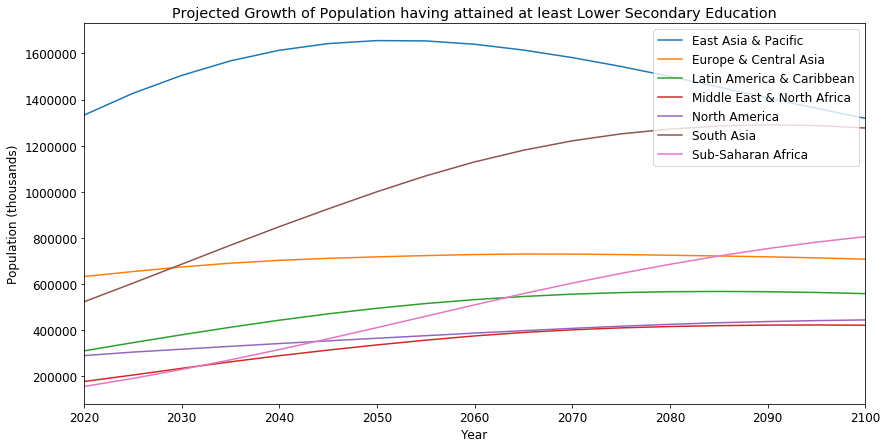

In [92]:
#Plot the projected relevant population per region
pivot.plot()
fig = plt.gcf()
fig.set_size_inches(14,7)
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.title('Projected Growth of Population having attained at least Lower Secondary Education')
plt.legend(loc = 'upper right');

In [93]:
#Make a second pivot based on country rather than region
pivot2 = future_data.pivot_table('Value', 'Year', 'Country Name' , aggfunc = 'sum')

In [94]:
#Make a list of the top 10 countries based on the 'Value' column
top10_countries = future_data.pivot_table('Value', 'Country Name').nlargest(10, 'Value').index.tolist()

In [95]:
#Keep only columns with country names found in the list created above
top10_countries_graph = pivot2[pivot2.columns.intersection(top10_countries)]

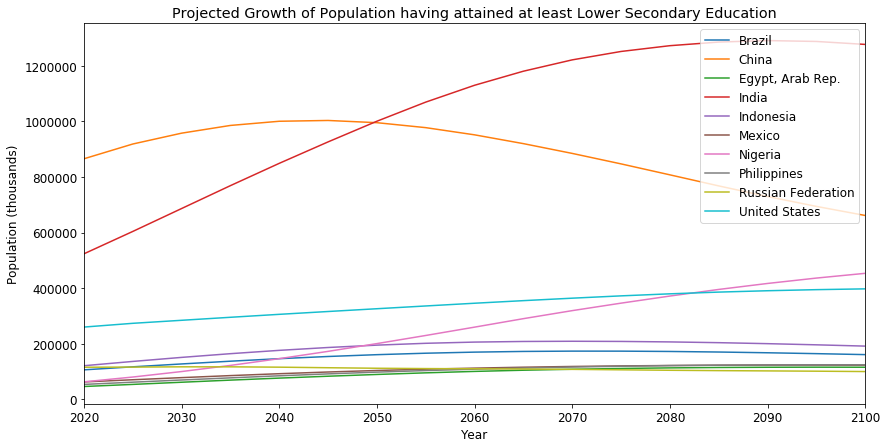

In [96]:
#Plot population evolution for top 5 countries
top10_countries_graph.plot()
fig = plt.gcf()
fig.set_size_inches(14,7)
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.title('Projected Growth of Population having attained at least Lower Secondary Education')
plt.legend(loc = 'upper right');

## Conclusions

Un seul pays se retrouve dans le top 10 des 3 indicateurs: United States.

Plusieurs pays se retrouvent dans le top 10 de population avec accès à Internet et top 10 de population future ayant un niveau Lower Secondary:
    -BRIC (Brazil, Russia, India, China)
    -Mexico
    -Indonesia
    
Avec la croissance de l’accès à Internet, plusieurs autres pays pourraient potentiellement devenir intéressants par la suite, notamment:
    -Nigeria, qui voit une forte croissance de population éduquée et qui est prédit d’avoir la 3ème plus large population au monde pour 2085.